
#  Real Estate Price Prediction - using Advanced Linear Regression Techniques

## Overview

There are several factors that influence the price a buyer is willing to pay for a house. Some are apparent and obvious and some are not. Nevertheless, a rational approach facilitated by machine learning can be very useful in predicting the house price. A large data set with 79 different features (like living area, number of rooms, location etc) along with their prices are provided for residential homes in Ames, Iowa. The challenge is to learn a relationship between the important features and the price and use it to predict the prices of a new set of houses.


Here's a brief version of what you'll find in the data description file.

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

## Content

1. **[Import packages](#import_packages)**
2. **[Load data](#load_data)**
3. **[Data preparation](#data_preparation)**
    - 3.1 - [Statistical Summary](#Statistical_Summary)
    - 3.2 - [Spliting Target Variable](#Spliting_Target_Variable)
    - 3.3 - [Feature Engineering](#Feature_Engineering)
    - 3.4 - [Split dataframe into numeric and categorical](#Split_dataframe)
    - 3.5 - [Reduce Skewness for Numeric Features](#Reduce_Skewness)
    - 3.6 - [Mean Normalization](#Mean_Normalization)
4. **[Missing Data Analysis](#treat_missing_values)**
5. **[Missing Data Treatment](#Missing_Data_Treatment)**
    - 5.1 - [Handling Missing Values in Numerical Columns](#Handling_Numerical_Columns)
    - 5.2 - [Handling Missing Values in Categorical Columns](#Handling_Categorical_Columns)
6. **[Dummy Coding](#dummy_coding)**
7. **[Exploratory Data Analysis](#exploratory_data_analysis)**
    - 7.1 - [Correlation](#Correlation)
    - 7.2 - [Correlation Plot](#correlation_plot)
8. **[Linear Regression Modeling](#modeling)**
    - 8.1 - [Preparation of datasets](#preparation_of_datasets)
  

<a id='import_packages'></a>
# 1. Import Packages

In [1]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='load_data'></a>
# 2. Load data
Read the House Price Dataset using pandas.read_csv function into an object(data)

In [2]:
data = pd.read_csv("train.csv")

<a id='data_preparation'></a>
# 3. Data Preparation
The process of data preparation entails cleansing, structuring and integrating data to make it ready for analysis. Here we first analyze the data statistically and then split the target varibles and normalize, followed by splitting the dataframe into numerical and categorical features.

In [53]:
# checking data types for variables in HousePrice dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [3]:
# Checking data size
data.shape

(1460, 81)

<a id='Statistical_Summary'></a>
# 3.1 Statistical Summary
Here we take a look at the summary of each attribute. This includes the count, mean, the min and max values as well as some percentiles for numeric variables and count, unique, top, freq for categorical variables.

In [6]:
# dataframe with categorical features
data.describe(include=['object'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [7]:
# dataframe with numerical features
data.describe(include=['int64'])

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<a id='Spliting_Target'></a>
# 3.2 Spliting Target Variable
Here the Target Variable is separated from data and the distribution is checked.

In [8]:
target = data['SalePrice']
target.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


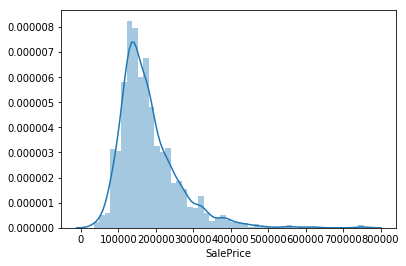

In [9]:
# Visualizing the distribution of Salesprice(Dependent) variable 
import seaborn as sns
sns.distplot(target,hist=True)

As we can see the distribution is left skewed, so in order to make it normally distributed, we need to use log transformation.

In [10]:
# Log transformation
import numpy as np
target_log  = np.log(target)

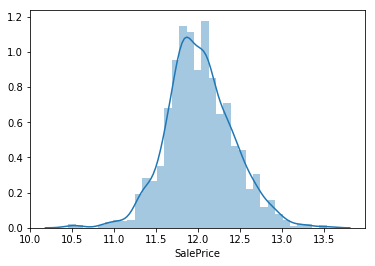

In [11]:
sns.distplot(target_log,hist=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A9E0DAABA8>,
      dtype=object)

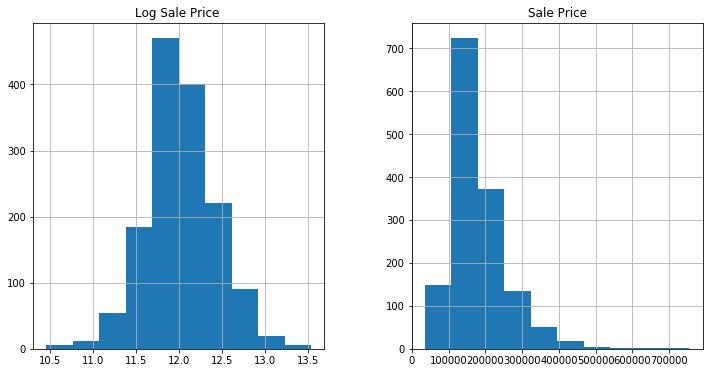

In [12]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"Sale Price":data["SalePrice"],"Log Sale Price ":target_log})
prices.hist()

After using log transformation, the Target variable is normally distributed.

In [13]:
# drop target variable from dataset
raw_data = data
data = data.drop(["SalePrice"], axis=1)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


<a id='Features_Engineering'></a>
# 3.3 Feature Engineering

In [14]:
#MSSubClass=The building class
data['MSSubClass'] = data['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
data['OverallCond'] = data['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)

In [15]:
# Adding total sqfootage feature 
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']

In [16]:

# Removing TotalBsmtSF,1stFlrSF, 2ndFlrSF and Id
data.drop(["TotalBsmtSF"], axis=1,inplace=True) ## Inplace will reassign the original
data = data.drop(["1stFlrSF"], axis=1)
data = data.drop(["2ndFlrSF"], axis=1)
data = data.drop(["Id"], axis=1)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,2566
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,2524
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,2706
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,2473
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,3343


<a id='Split_dataframe'></a>
# 3.4 Split Dataframe into numeric and categorical
Split dataframe into 2 with:

* categorical features
* numerical features

In [17]:
data.columns.values

array(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
      

In [18]:
# save all categorical columns in list
categorical_columns = [col for col in data.columns.values if data[col].dtype == 'object'] ## object means categorical variable
## Here we are selecting all columns an then putting the categorical column in Categorical_columns.

In [19]:
categorical_columns

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [20]:


# dataframe with categorical features
data_cat = data[categorical_columns]
# dataframe with numerical features
data_num = data.drop(categorical_columns, axis=1)

In [21]:
data_cat.describe()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
count,1460,1460,1460,91,1460,1460,1460,1460,1460,1460,...,1379,1379,1460,7,281,54,1460,1460,1460,1460
unique,15,5,2,2,4,4,2,5,3,25,...,5,5,3,3,4,4,12,5,9,6
top,20,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,TA,TA,Y,Gd,MnPrv,Shed,6,2009,WD,Normal
freq,536,1151,1454,50,925,1311,1459,1052,1382,225,...,1311,1326,1340,3,157,49,253,338,1267,1198


In [22]:
# Using describe function in numeric dataframe 
data_num.describe()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TotalSF
count,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,6.099315,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,5.844521,...,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,2567.048630
std,24.284752,9981.264932,1.382997,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,48.623081,...,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,821.714421
min,21.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000
25%,59.000000,7553.500000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,0.000000,...,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.500000
50%,69.000000,9478.500000,6.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,0.000000,...,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2474.000000
75%,80.000000,11601.500000,7.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,0.000000,...,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3004.000000
max,313.000000,215245.000000,10.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,572.000000,...,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,11752.000000


In [23]:
# Printing 5 head observation in categorical dataframe
data_cat.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,TA,Y,NaN,NaN,NaN,2,2008,WD,Normal
1,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,TA,TA,Y,NaN,NaN,NaN,5,2007,WD,Normal
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,TA,Y,NaN,NaN,NaN,9,2008,WD,Normal
3,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,TA,TA,Y,NaN,NaN,NaN,2,2006,WD,Abnorml
4,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,TA,TA,Y,NaN,NaN,NaN,12,2008,WD,Normal


# 3.5 Reduce Skewness for Numeric Features

Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point. Here we are interested in the variables which have skewness more than 0.75


![](https://www.managedfuturesinvesting.com/images/default-source/default-album/skewness---mean-median-mode.jpg?sfvrsn=0)

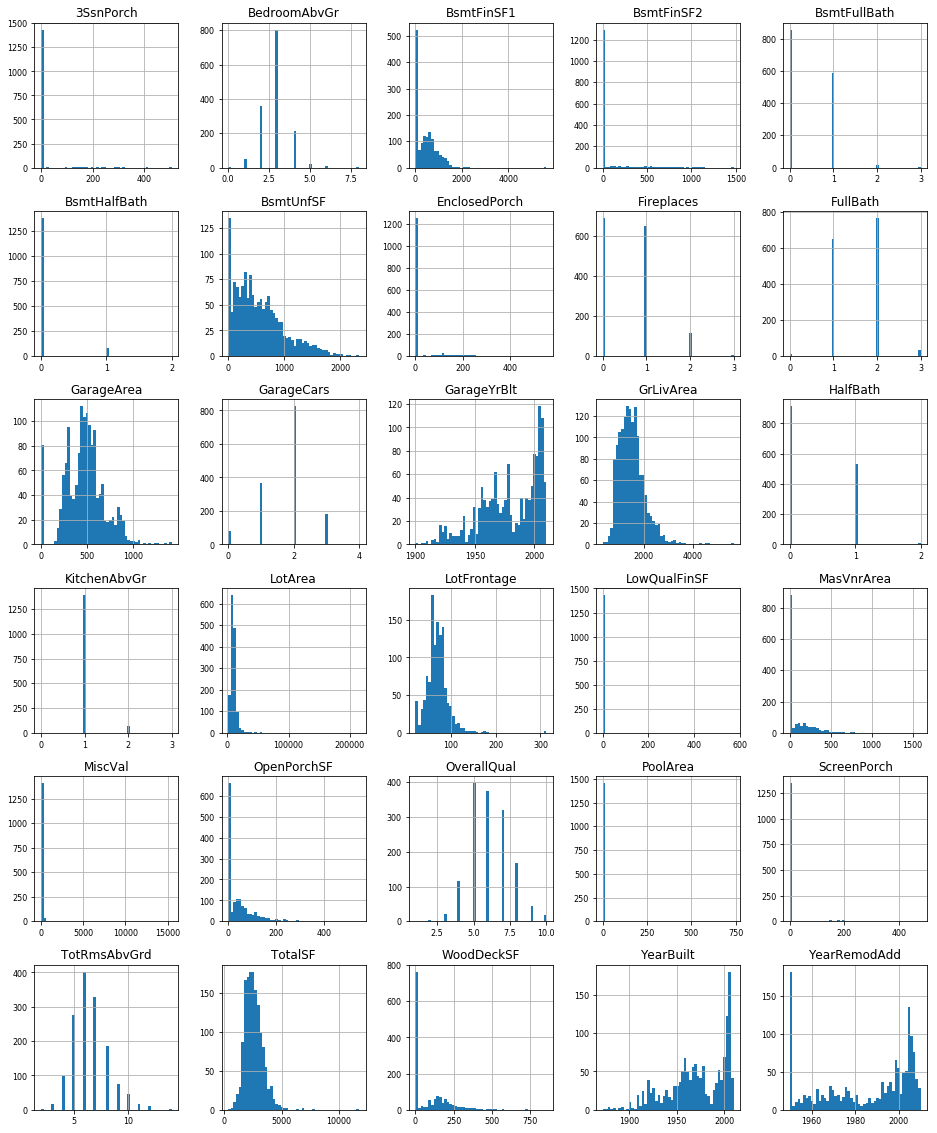

In [25]:
data_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

In [26]:
from scipy.stats import skew
data_num_skew = data_num.apply(lambda x: skew(x.dropna()))
data_num_skew = data_num_skew[data_num_skew > .75]

# apply log + 1 transformation for all numeric features with skewnes over .75
data_num[data_num_skew.index] = np.log1p(data_num[data_num_skew.index])

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log1p
  


In [27]:
# List of variables has skewness more than 0.75
data_num_skew

LotFrontage       2.160866
LotArea          12.195142
MasVnrArea        2.666326
BsmtFinSF1        1.683771
BsmtFinSF2        4.250888
BsmtUnfSF         0.919323
LowQualFinSF      9.002080
GrLivArea         1.365156
BsmtHalfBath      4.099186
KitchenAbvGr      4.483784
WoodDeckSF        1.539792
OpenPorchSF       2.361912
EnclosedPorch     3.086696
3SsnPorch        10.293752
ScreenPorch       4.117977
PoolArea         14.813135
MiscVal          24.451640
TotalSF           1.774874
dtype: float64

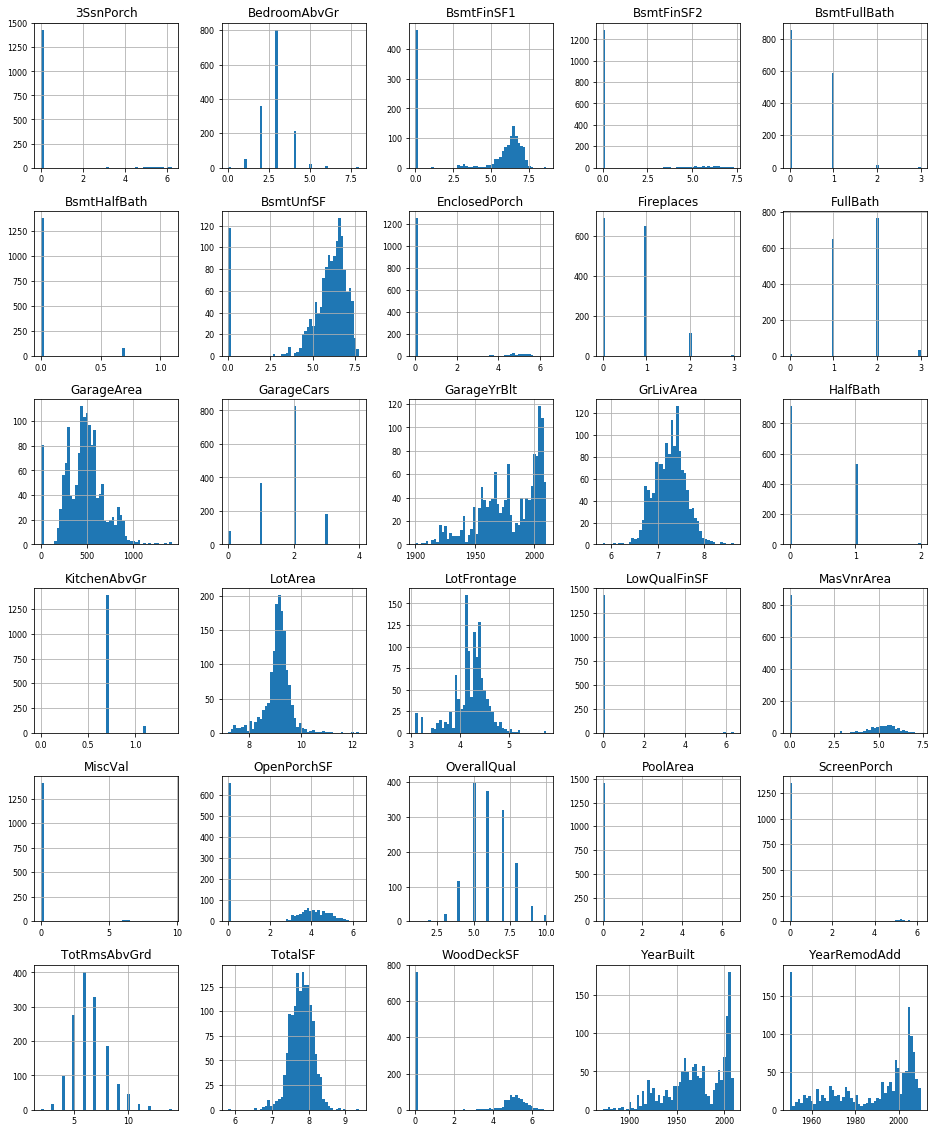

In [28]:
data_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

<a id='mean_normalization'></a>
# 3.6 Mean Normalization

In [32]:
data_num = ((data_num - data_num.mean())/(data_num.max() - data_num.min()))
data_num.describe()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TotalSF
count,1.201000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.452000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,...,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03
mean,1.494947e-15,4.984835e-16,1.946692e-17,2.267735e-16,1.541119e-15,-2.879545e-16,4.277020e-16,1.277517e-17,5.977049e-16,-2.756072e-17,...,7.551037e-17,-6.957905e-18,4.643166e-16,-4.462564e-16,6.616663e-17,-1.454791e-17,1.127333e-17,-7.648467e-17,2.399622e-17,-1.981462e-15
std,1.302418e-01,1.012732e-01,1.536663e-01,2.188616e-01,3.440901e-01,3.566180e-01,3.463615e-01,2.528701e-01,2.390241e-01,1.176771e-01,...,1.868288e-01,1.507792e-01,3.843948e-01,3.413088e-01,2.735105e-01,1.070007e-01,2.272059e-01,6.641407e-02,1.270673e-01,8.809425e-02
min,-4.198342e-01,-3.797634e-01,-5.665906e-01,-7.193319e-01,-5.810959e-01,-2.889448e-01,-4.896358e-01,-8.982469e-02,-7.282006e-01,-1.571654e-02,...,-4.417808e-01,-3.335544e-01,-3.637825e-01,-3.660704e-01,-1.105272e-01,-1.374717e-02,-6.649616e-02,-4.607065e-03,-2.419569e-02,-5.589950e-01
25%,-4.241893e-02,-3.544346e-02,-1.221461e-01,-1.251290e-01,-2.977626e-01,-2.889448e-01,-4.896358e-01,-8.982469e-02,-3.051994e-02,-1.571654e-02,...,-1.917808e-01,-9.765877e-02,-3.637825e-01,-3.660704e-01,-1.105272e-01,-1.374717e-02,-6.649616e-02,-4.607065e-03,-2.419569e-02,-5.530119e-02
50%,1.556841e-02,8.988780e-03,-1.103501e-02,1.255211e-02,1.522374e-01,-2.889448e-01,1.993641e-01,-8.982469e-02,6.733259e-02,-1.571654e-02,...,5.821918e-02,4.950538e-03,-3.637825e-01,1.505731e-01,-1.105272e-01,-1.374717e-02,-6.649616e-02,-4.607065e-03,-2.419569e-02,3.122795e-03
75%,7.047235e-02,4.854699e-02,1.000761e-01,2.082043e-01,3.189041e-01,4.047022e-01,2.708912e-01,-8.982469e-02,1.350357e-01,-1.571654e-02,...,5.821918e-02,7.265153e-02,3.956845e-01,3.053412e-01,-1.105272e-01,-1.374717e-02,-6.649616e-02,-4.607065e-03,-2.419569e-02,5.766237e-02
max,5.801658e-01,6.202366e-01,4.334094e-01,2.806681e-01,4.189041e-01,7.110552e-01,5.103642e-01,9.101753e-01,2.717994e-01,9.842835e-01,...,5.582192e-01,6.664456e-01,6.362175e-01,6.339296e-01,8.894728e-01,9.862528e-01,9.335038e-01,9.953929e-01,9.758043e-01,4.410050e-01


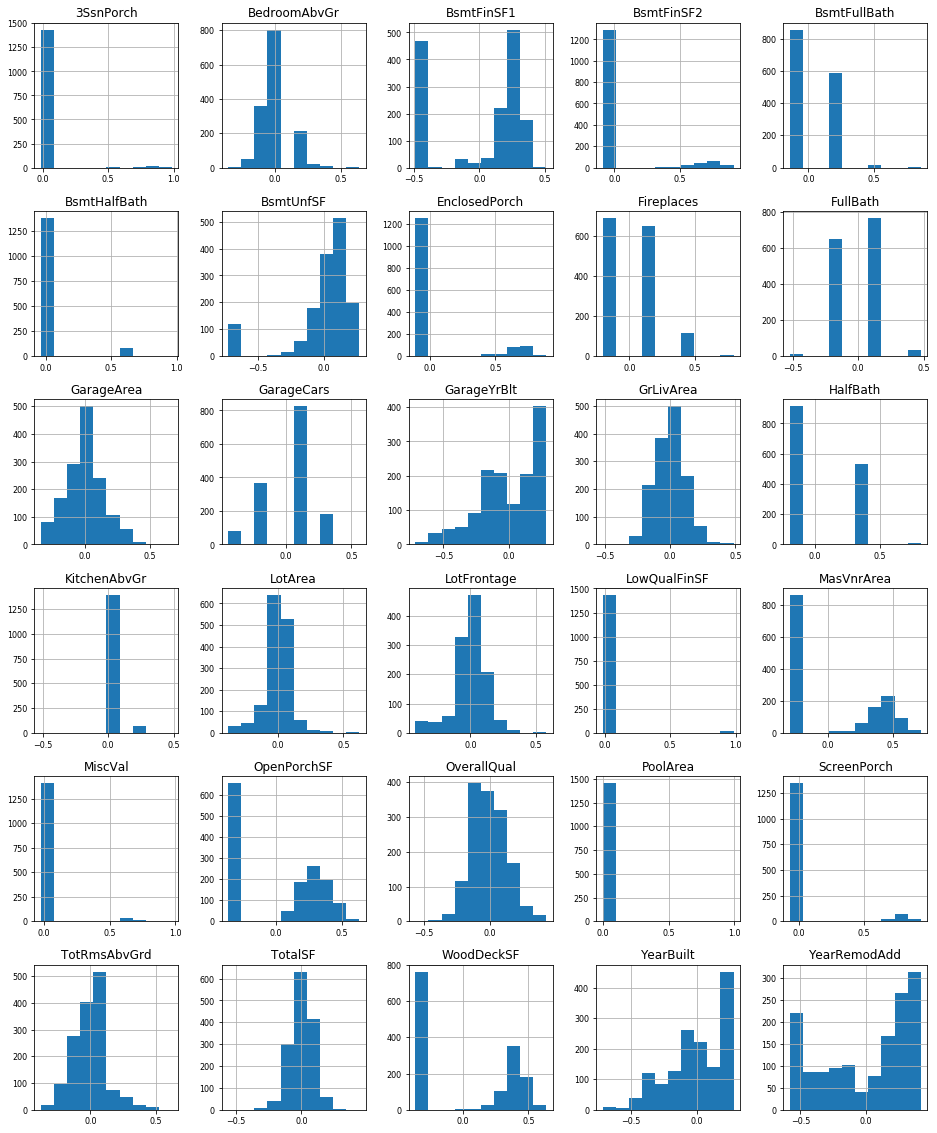

In [34]:
data_num.hist(figsize=(16, 20),xlabelsize=8, ylabelsize=8);

After Mean Normalization the data scale will change and it will not affect original data distribution 

<a id='treat_missing_values'></a>

# 4. Missing Data Analysis

If the missing values are not handled properly we may end up drawing an inaccurate inference about the data. Due to improper handling, the result obtained will differ from the ones where the missing values are present.

In [35]:
# first we'll visualize null count in overall dataframe
null_in_HousePrice = data.isnull().sum()
null_in_HousePrice = null_in_HousePrice[null_in_HousePrice > 0]

In [36]:
null_in_HousePrice

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [37]:
null_in_HousePrice.sort_values(inplace=True)

In [38]:
null_in_HousePrice

Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

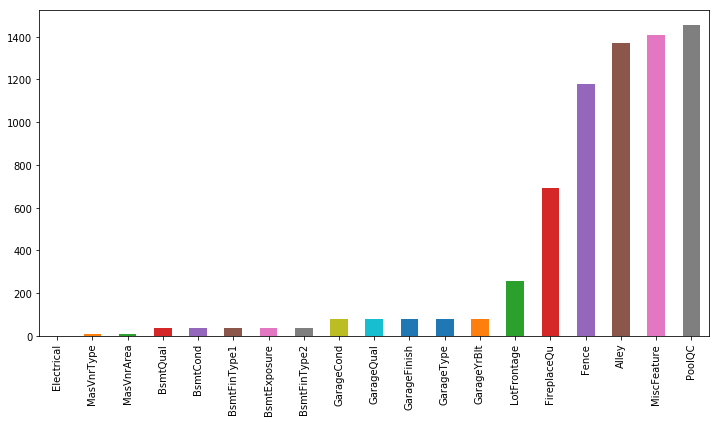

In [39]:
null_in_HousePrice.plot.bar()

In [40]:
# Printing total numbers and percentage of missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.shape[0]).sort_values(ascending=False)  ## data.isnull().count will give boolean data coun so use this data.shape[0]) 
## data.shape[0]) will give total number of rows! 
###percent = (data.isnull().sum()/data.shape[0]).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


<a id='Missing_Data_Treatment'></a>
# 5. Missing Data Treatment
We may leave the data as it is or do data imputation to replace them. Suppose the number of cases of missing values is extremely small; then we may drop or omit those values from the analysis. In statistical language, if the number of the cases is less than 5% of the sample, then we can drop them.

If there is a larger number of missing values, then it is better to drop those cases (rather than do imputation) and replace them.

# 5.1 Handling Missing Values in Numerical Columns
Here we do data imputation. If the number of missing values is more than 260, we drop those values from the analysis.

In [41]:
data_len = data_num.shape[0]

# check what is percentage of missing values in categorical dataframe
for col in data_num.columns.values:
    missing_values = data_num[col].isnull().sum()
    #print("{} - missing values: {} ({:0.2f}%)".format(col, missing_values, missing_values/data_len*100)) 
    
    # drop column if there is more than 50 missing values
    if missing_values > 260:
        #print("droping column: {}".format(col))
        data_num = data_num.drop(col, axis = 1)
    # if there is less than 260 missing values than fill in with median valu of column
    else:
        #print("filling missing values with median in column: {}".format(col))
        data_num = data_num.fillna(data_num[col].median())

# 5.2 Handling Missing Values in Categorical Columns
Here we do data imputation. If the number of missing values is more than 50, we drop the column from the analysis.

In [42]:
data_len = data_cat.shape[0]

# check what is percentage of missing values in categorical dataframe
for col in data_cat.columns.values:
    missing_values = data_cat[col].isnull().sum()
    #print("{} - missing values: {} ({:0.2f}%)".format(col, missing_values, missing_values/data_len*100)) 
    
    # drop column if there is more than 50 missing values
    if missing_values > 50:
        print("droping column: {}".format(col))
        data_cat.drop(col, axis = 1)
    # if there is less than 50 missing values than fill in with median valu of column
    else:
        #print("filling missing values with XXX: {}".format(col))
        #data_cat = data_cat.fillna('XXX')
        pass

droping column: Alley
droping column: FireplaceQu
droping column: GarageType
droping column: GarageFinish
droping column: GarageQual
droping column: GarageCond
droping column: PoolQC
droping column: Fence
droping column: MiscFeature


In [43]:
data_cat.describe()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
count,1460,1460,1460,91,1460,1460,1460,1460,1460,1460,...,1379,1379,1460,7,281,54,1460,1460,1460,1460
unique,15,5,2,2,4,4,2,5,3,25,...,5,5,3,3,4,4,12,5,9,6
top,20,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,TA,TA,Y,Gd,MnPrv,Shed,6,2009,WD,Normal
freq,536,1151,1454,50,925,1311,1459,1052,1382,225,...,1311,1326,1340,3,157,49,253,338,1267,1198


<a id='dummy_coding'></a>
# 6. Dummy Coding for Categorical Variables
Dummy coding is a way of incorporating nominal variables into regression analysis. It allows us to turn categories into something a regression can treat as having a high (1) and low (0) score. Any binary variable can be thought of as having directionality, because if it is higher, it is category 1, but if it is lower, it is category 0. This allows the regression look at directionality by comparing two sides, rather than expecting each unit to correspond with some kind of increase.

In [44]:
data_cat.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [45]:
# Using pandas.get_dummies function to Convert categorical variable into dummy/indicator variables
data_cat_dummies  = pd.get_dummies(data_cat,drop_first=True)

In [46]:
# Viewing dimensionality of the DataFrame.
data_cat_dummies.head()

,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [47]:
print("Numerical features : " + str(len(data_num.columns)))
print("Categorical features : " + str(len(data_cat_dummies.columns)))

Numerical features : 30
Categorical features : 246


In [48]:
# using concat function we merging two dataframe for furthere analysis
newdata = pd.concat([data_num, data_cat_dummies], axis=1)

# 7. Exploratory Data Analysis

C:\Users\Dell\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


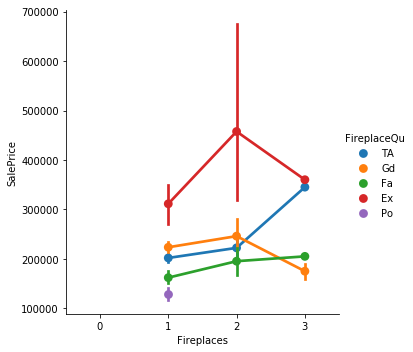

In [50]:
sns.factorplot("Fireplaces","SalePrice",data=raw_data,hue="FireplaceQu");

If there are two fireplaces, the Sales Price increases.
Also, if there are fireplace of Excellent quality in the house the Sales Price increases.

In [51]:
# If fireplace is missing that means that house doesn't have a FireplaceQu
FireplaceQu = raw_data["FireplaceQu"].fillna('None')
pd.crosstab(raw_data.Fireplaces, raw_data.FireplaceQu)

FireplaceQu,Ex,Fa,Gd,Po,TA
Fireplaces,,,,,
1,19,28,324,20,259
2,4,4,54,0,53
3,1,1,2,0,1


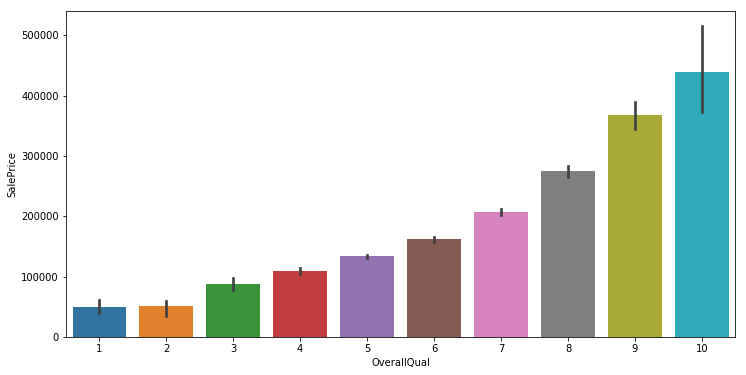

In [52]:
sns.barplot(raw_data.OverallQual,raw_data.SalePrice)

As we can see, the Sales Price increases with the increase in Overall Quality.

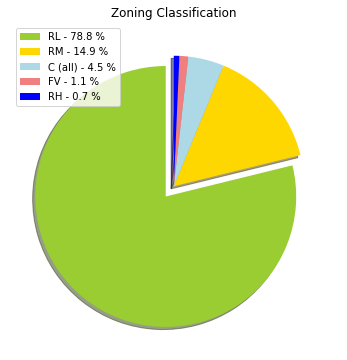

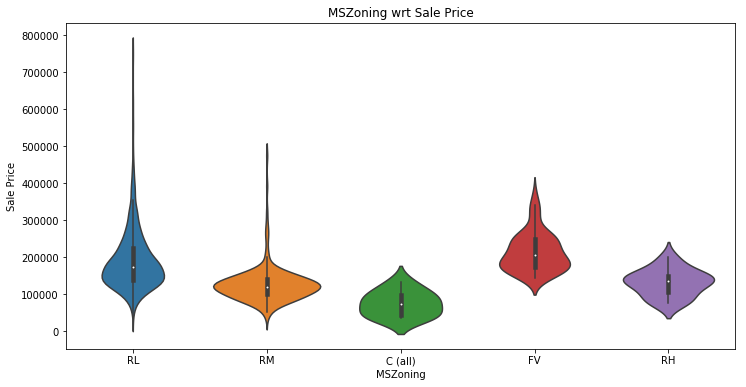

In [53]:
# MSZoning
labels = raw_data["MSZoning"].unique()
sizes = raw_data["MSZoning"].value_counts().values
explode=[0.1,0,0,0,0]
parcent = 100.*sizes/sizes.sum()
labels = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(labels, parcent)]

colors = ['yellowgreen', 'gold', 'lightblue', 'lightcoral','blue']
patches, texts= plt.pie(sizes, colors=colors,explode=explode,
                        shadow=True,startangle=90)
plt.legend(patches, labels, loc="best")

plt.title("Zoning Classification")
plt.show()

sns.violinplot(raw_data.MSZoning,raw_data["SalePrice"])
plt.title("MSZoning wrt Sale Price")
plt.xlabel("MSZoning")
plt.ylabel("Sale Price");

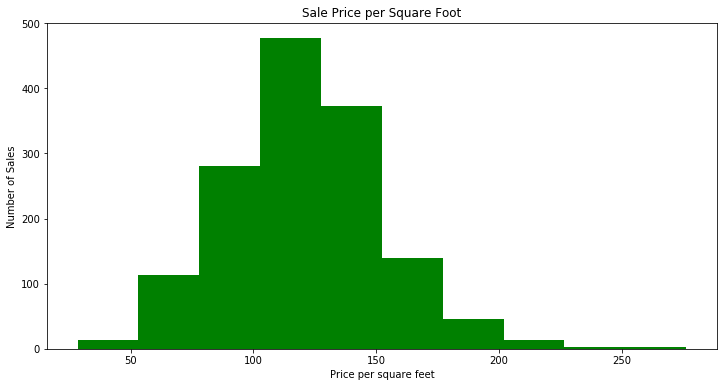

In [54]:
# SalePrice per Square Foot
SalePriceSF = raw_data['SalePrice']/raw_data['GrLivArea']
plt.hist(SalePriceSF, color="green")
plt.title("Sale Price per Square Foot")
plt.ylabel('Number of Sales')
plt.xlabel('Price per square feet');

Most of the sales happend in 100 to 150 square feet

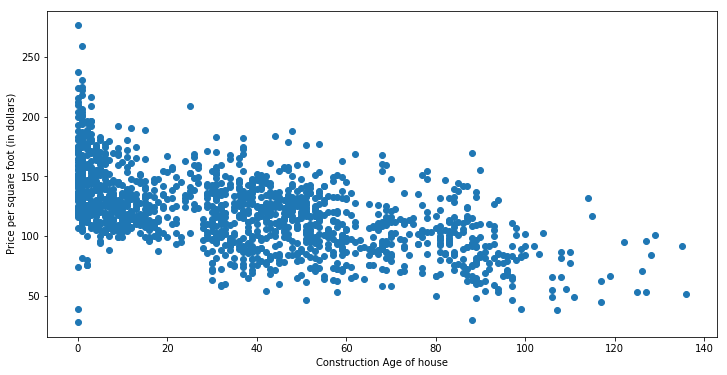

In [55]:
ConstructionAge = raw_data['YrSold'] - raw_data['YearBuilt']
plt.scatter(ConstructionAge, SalePriceSF)
plt.ylabel('Price per square foot (in dollars)')
plt.xlabel("Construction Age of house");

From the above representation, price of house goes down with its age.

C:\Users\Dell\Anaconda3\lib\site-packages\seaborn\categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


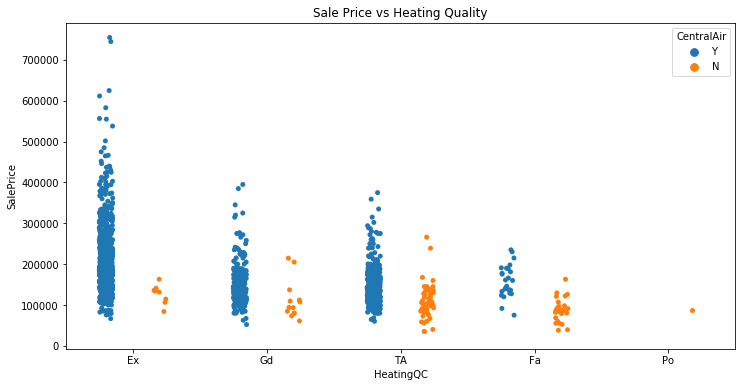

In [56]:
# Heating and AC arrangements
sns.stripplot(x="HeatingQC", y="SalePrice",data=raw_data,hue='CentralAir',jitter=True,split=True)
plt.title("Sale Price vs Heating Quality");

Having AC definitely escalates price of house.

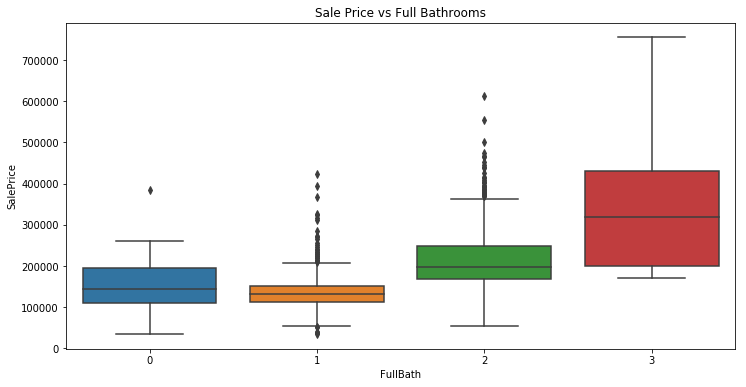

In [58]:
sns.boxplot(raw_data["FullBath"],raw_data["SalePrice"])
plt.title("Sale Price vs Full Bathrooms");

C:\Users\Dell\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


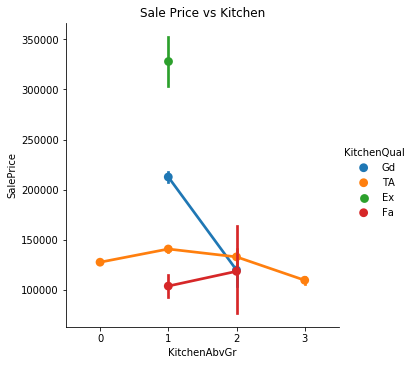

In [59]:
# Kitchen Quality
sns.factorplot("KitchenAbvGr","SalePrice",data=raw_data,hue="KitchenQual")
plt.title("Sale Price vs Kitchen");

Having one Kitchen of Excellent quality hikes house price.

# 7.1 Correlation

In [60]:
# Check Correlation
data_num.corr()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TotalSF
LotFrontage,1.000000,0.652386,0.205269,0.087589,0.059305,0.117652,0.067373,0.035608,0.102782,-0.006357,...,0.273091,0.317798,0.059865,0.133624,-0.021137,0.056284,0.044893,0.119599,0.028491,0.372916
LotArea,0.652386,1.000000,0.178220,0.021943,0.027672,0.070651,0.096966,0.084312,0.047510,-0.010681,...,0.272010,0.322048,0.122915,0.137754,-0.015186,0.055375,0.087518,0.097257,0.080298,0.427126
OverallQual,0.205269,0.178220,1.000000,0.572323,0.550684,0.413958,0.054199,-0.101469,0.268446,-0.029924,...,0.600671,0.562022,0.283256,0.445101,-0.158648,0.027546,0.049983,0.072651,-0.085131,0.678565
YearBuilt,0.087589,0.021943,0.572323,1.000000,0.592855,0.412631,0.151209,-0.068793,0.090576,-0.182266,...,0.537850,0.478954,0.307474,0.389065,-0.446694,0.028977,-0.059629,0.005805,-0.077819,0.366477
YearRemodAdd,0.059305,0.027672,0.550684,0.592855,1.000000,0.224771,0.012105,-0.102425,0.167086,-0.057486,...,0.420622,0.371600,0.285773,0.382743,-0.226996,0.052398,-0.039983,0.009025,-0.074574,0.362181
MasVnrArea,0.117652,0.070651,0.413958,0.412631,0.224771,1.000000,0.187145,-0.063123,0.093741,-0.108616,...,0.390094,0.371069,0.161452,0.209989,-0.186108,0.047022,0.037353,0.005346,-0.054501,0.382169
BsmtFinSF1,0.067373,0.096966,0.054199,0.151209,0.012105,0.187145,1.000000,0.185051,-0.265488,-0.063563,...,0.070302,0.117933,0.082144,0.015075,-0.127733,0.051775,0.073392,0.042147,0.018808,0.167094
BsmtFinSF2,0.035608,0.084312,-0.101469,-0.068793,-0.102425,-0.063123,0.185051,1.000000,-0.272666,0.006314,...,-0.053164,-0.018257,0.059134,-0.077644,0.038587,-0.022537,0.063879,0.068055,0.027978,0.019398
BsmtUnfSF,0.102782,0.047510,0.268446,0.090576,0.167086,0.093741,-0.265488,-0.272666,1.000000,0.001886,...,0.146919,0.113877,0.014448,0.182827,0.001014,0.004390,0.012820,-0.026761,-0.030640,0.377397
LowQualFinSF,-0.006357,-0.010681,-0.029924,-0.182266,-0.057486,-0.108616,-0.063563,0.006314,0.001886,1.000000,...,-0.094253,-0.071387,-0.037934,-0.000397,0.047332,0.016699,-0.014132,0.068662,0.025156,-0.022774


# 7.2 Correlation Plot

Text(0.5, 1.0, 'Correlation between features')

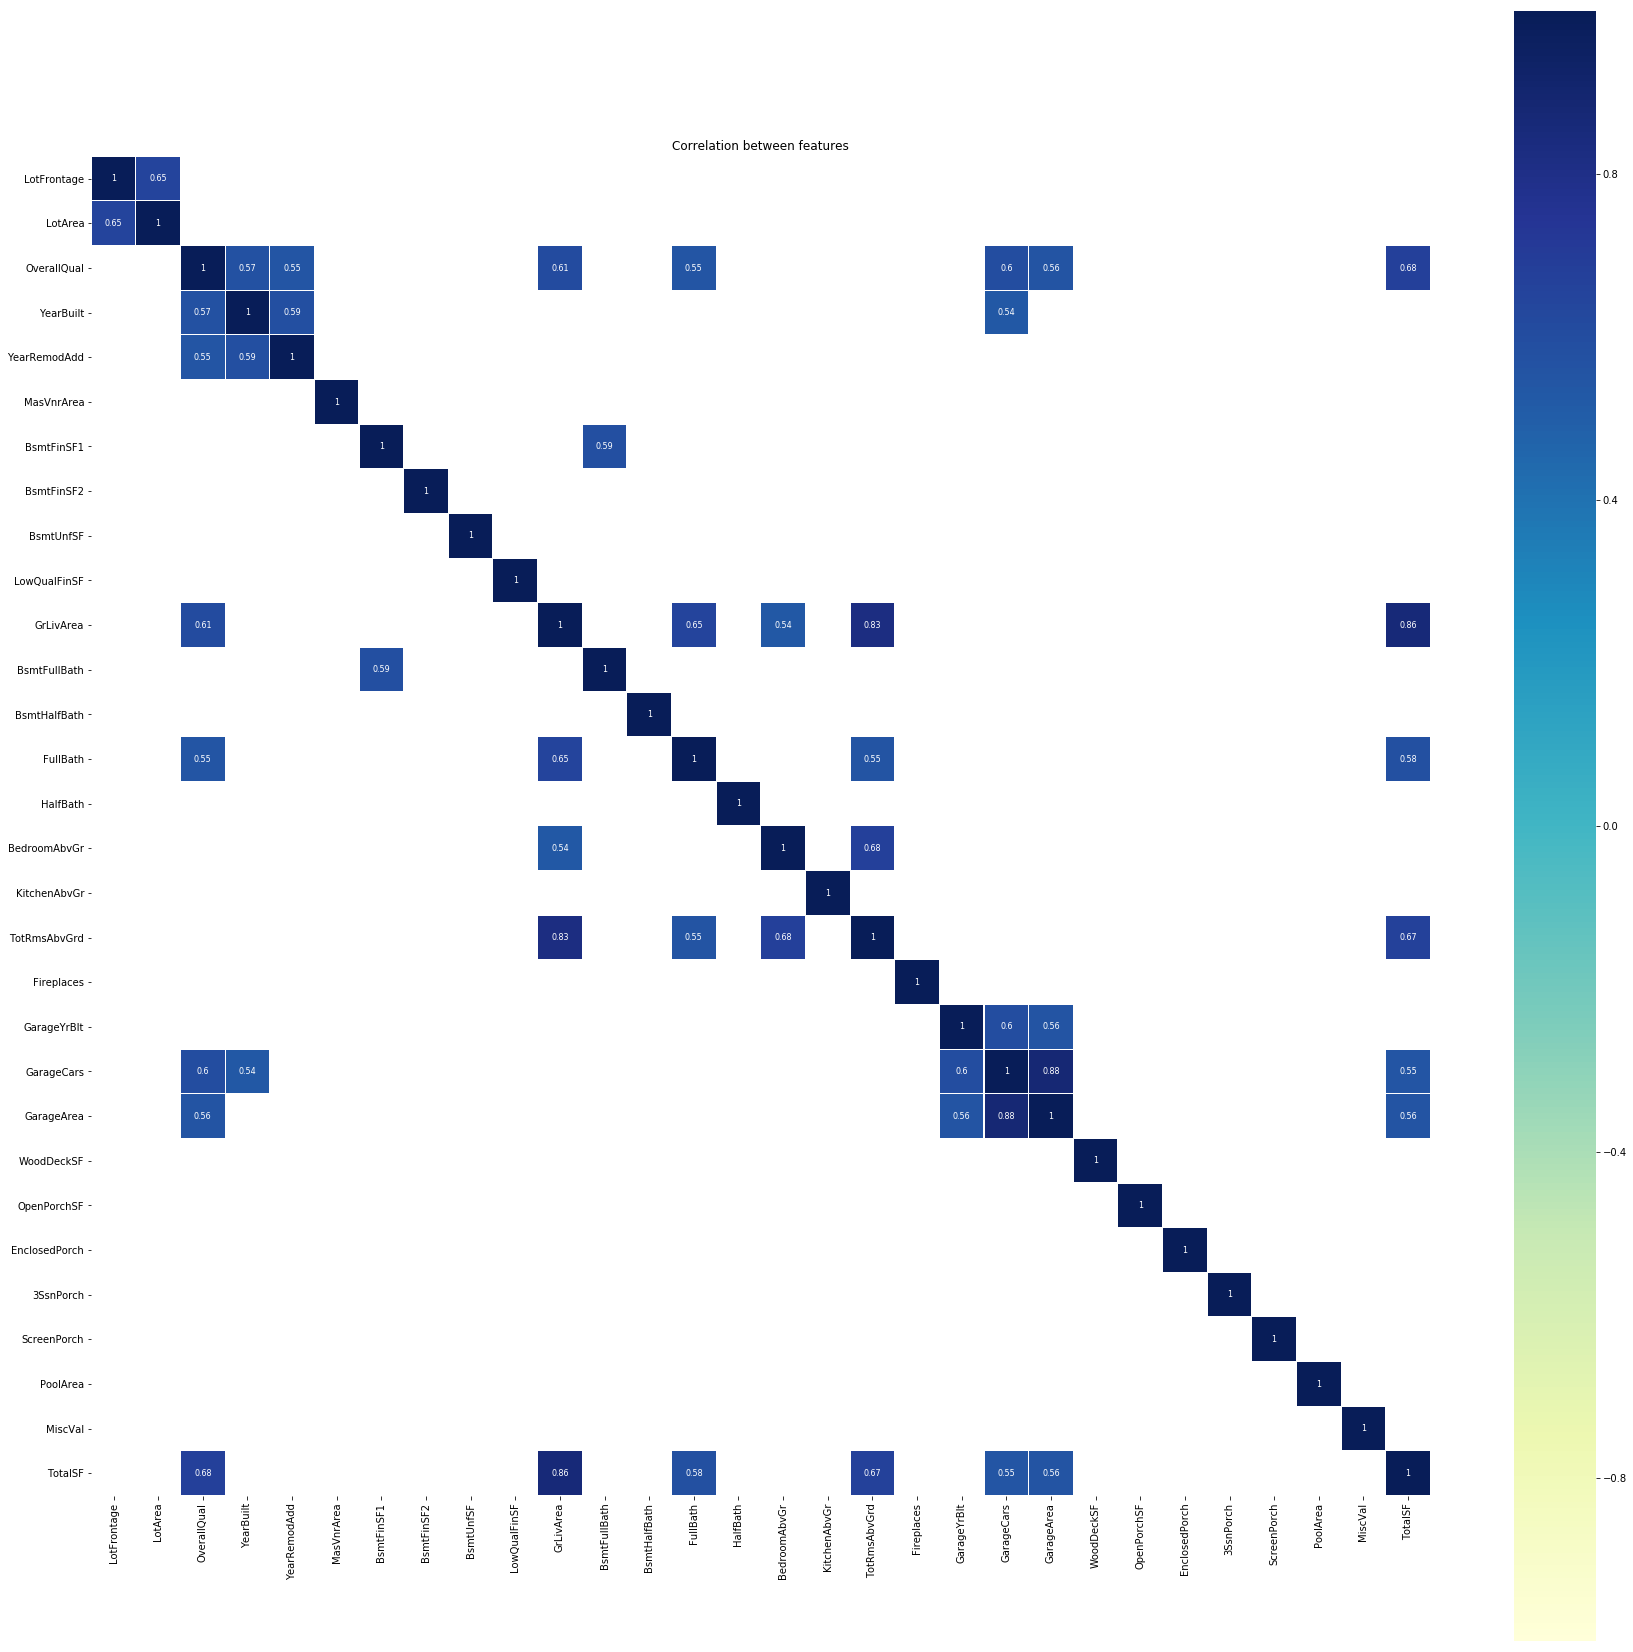

In [163]:
# Ploting correlation plot
import matplotlib.pyplot as plt
corr=data_num.corr()
plt.figure(figsize=(30, 30))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);
plt.title('Correlation between features')

As we can see above there are few features which show high multicollinearity from heatmap. Dark Blue squares on diagonal line has high multicollinearity 

# 8. Linear Regression Modeling

# 8.1 Preparation of Datasets
Split the dataset into Train & Test

In [61]:
import sklearn

In [62]:
#Let us now split the dataset into train & test
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(newdata, target_log, test_size = 0.30, random_state=0)
print("x_train ",x_train.shape)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

x_train  (1022, 276)
x_test  (438, 276)
y_train  (1022,)
y_test  (438,)


# 8.2 Building a Linear Regression Base Model

In [63]:
# Lets build Linear Regression model using statsmodel
import statsmodels.api as sm

# Building Linear Regression model using OLS 
model1 = sm.OLS(y_train, x_train).fit()
# Note the Swap of X and Y 

In [64]:
# Printing Linear Regression Summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     65.93
Date:                Wed, 23 Jan 2019   Prob (F-statistic):               0.00
Time:                        15:33:12   Log-Likelihood:                 1105.1
No. Observations:                1022   AIC:                            -1680.
Df Residuals:                     757   BIC:                            -374.0
Df Model:                         264                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
LotFrontage               0.0851      0.051      1.656      0.098      -0.016       0.186
LotArea                   0.5269      0.079      6.655      0.000       0.371       0.682
OverallQual               0.3031      0.050      6.053      0.000       0.205       0.401
YearBuilt                 0.2539      0.065      3.888      0.000       0.126       0.382
YearRemodAdd              0.0491      0.019      2.613      0.009       0.012       0.086
MasVnrArea                0.0549      0.047      1.161      0.246      -0.038       0.148
BsmtFinSF1                0.0975      0.051      1.899      0.058      -0.003       0.198
BsmtFinSF2               -0.0001      0.077     -0.001      0.999      -0.151       0.150
BsmtUnfSF                -0.0355      0.026     -1.378      0.169      -0.086       0.015
LowQualFinSF              0.0102      0.040      0.257      0.797      -0.068       0.088
GrLivArea                 0.6069      0.179      3.383      0.001       0.255       0.959
BsmtFullBath              0.0870      0.031      2.832      0.005       0.027       0.147
BsmtHalfBath              0.0446      0.027      1.671      0.095      -0.008       0.097
FullBath                  0.1088      0.036      3.028      0.003       0.038       0.179
HalfBath                  0.0598      0.024      2.484      0.013       0.013       0.107
BedroomAbvGr             -0.0739      0.062     -1.199      0.231      -0.195       0.047
KitchenAbvGr             -0.1743      0.115     -1.513      0.131      -0.401       0.052
TotRmsAbvGrd              0.0416      0.059      0.701      0.484      -0.075       0.158
Fireplaces                0.0576      0.036      1.586      0.113      -0.014       0.129
GarageYrBlt              -0.0139      0.038     -0.369      0.712      -0.088       0.060
GarageCars                0.0163      0.052      0.316      0.752      -0.085       0.118
GarageArea                0.1902      0.063      3.018      0.003       0.066       0.314
WoodDeckSF                0.0395      0.010      3.821      0.000       0.019       0.060
OpenPorchSF               0.0078      0.013      0.617      0.538      -0.017       0.033
EnclosedPorch             0.0095      0.015      0.621      0.535      -0.021       0.040
3SsnPorch                -0.0038      0.034     -0.112      0.911      -0.070       0.062
ScreenPorch               0.0385      0.016      2.481      0.013       0.008       0.069
PoolArea                 -0.0219      0.164     -0.133      0.894      -0.344       0.301
MiscVal                   0.0422      0.092      0.460      0.645      -0.138       0.222
TotalSF                   0.9423      0.215      4.387      0.000       0.521       1.364
MSSubClass_160           -0.0668      0.058     -1.150      0.250      -0.181       0.047
MSSubClass_180         

In [65]:
from IPython.display import Image

# Model Evaluation Metrics for Regression

Metrics can we used for regression problems are

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:
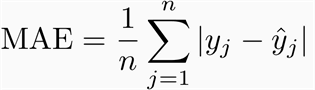

 
Mean Squared Error (MSE) is the mean of the squared errors:
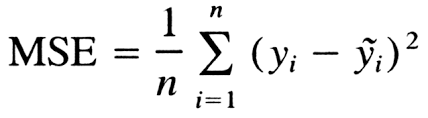
 
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
![](https://cdn-images-1.medium.com/max/1600/1*9hQVcasuwx5ddq_s3MFCyw.gif)



In [66]:
def rmse(predictions, targets):

    differences = predictions - targets                       # the DIFFERENCEs.

    differences_squared = differences ** 2                    # the SQUAREs of ^

    mean_of_differences_squared = differences_squared.mean()  # the MEAN of ^

    rmse_val = np.sqrt(mean_of_differences_squared)           # ROOT of ^

    return rmse_val 

In [67]:
cols = ['Model', 'R-Squared Value', 'Adj.R-Squared Value', 'RMSE']
models_report = pd.DataFrame(columns = cols)
# Predicting the model on test data
predictions1 = model1.predict(x_test)

In [68]:

tmp1 = pd.Series({'Model': " Base Linear Regression Model",
                 'R-Squared Value' : model1.rsquared,
                 'Adj.R-Squared Value': model1.rsquared_adj,
                 'RMSE': rmse(predictions1, y_test)})

model1_report = models_report.append(tmp1, ignore_index = True)
model1_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,Base Linear Regression Model,0.958319,0.943784,0.463055


# 8.3 Building Model with Constant

In [69]:
df_constant = sm.add_constant(newdata)

In [70]:
x_train1,x_test1, y_train1, y_test1 = train_test_split(df_constant, target_log, test_size = 0.30, random_state=0)

In [71]:
# Lets build Linear Regression model using statsmodel
import statsmodels.api as sm

# Building Linear Regression model using OLS 
model2 = sm.OLS(y_train1, x_train1).fit()
# Note the Swap of X and Y 

In [72]:
# Printing Linear Regression Summary
model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
=====================================================================
Model:                OLS              Adj. R-squared:     0.944     
Dependent Variable:   SalePrice        AIC:                -1680.2974
Date:                 2019-01-23 15:46 BIC:                -373.9755 
No. Observations:     1022             Log-Likelihood:     1105.1    
Df Model:             264              F-statistic:        65.93     
Df Residuals:         757              Prob (F-statistic): 0.00      
R-squared:            0.958            Scale:              0.0090913 
---------------------------------------------------------------------
                       Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
---------------------------------------------------------------------
const                  9.2895   0.2045 45.4308 0.0000  8.8881  9.6910
LotFrontage            0.0851   0.0514  1.6559 0.0982 -0.0158  0.1860
LotArea                0.5269   0.0792  6.6549 0.0000  0.3715  0.6824
OverallQual            0.3031   0.0501  6.0531 0.0000  0.2048  0.4014
YearBuilt              0.2539   0.0653  3.8882 0.0001  0.1257  0.3820
YearRemodAdd           0.0491   0.0188  2.6128 0.0092  0.0122  0.0860
MasVnrArea             0.0549   0.0473  1.1609 0.2460 -0.0379  0.1478
BsmtFinSF1             0.0975   0.0514  1.8994 0.0579 -0.0033  0.1984
BsmtFinSF2            -0.0001   0.0767 -0.0013 0.9989 -0.1506  0.1504
BsmtUnfSF             -0.0355   0.0258 -1.3782 0.1685 -0.0861  0.0151
LowQualFinSF           0.0102   0.0398  0.2568 0.7974 -0.0679  0.0884
GrLivArea              0.6069   0.1794  3.3825 0.0008  0.2547  0.9591
BsmtFullBath           0.0870   0.0307  2.8315 0.0048  0.0267  0.1473
BsmtHalfBath           0.0446   0.0267  1.6712 0.0951 -0.0078  0.0969
FullBath               0.1088   0.0359  3.0285 0.0025  0.0383  0.1794
HalfBath               0.0598   0.0241  2.4843 0.0132  0.0126  0.1071
BedroomAbvGr          -0.0739   0.0617 -1.1985 0.2311 -0.1949  0.0471
KitchenAbvGr          -0.1743   0.1152 -1.5127 0.1308 -0.4005  0.0519
TotRmsAbvGrd           0.0416   0.0593  0.7007 0.4837 -0.0749  0.1580
Fireplaces             0.0576   0.0363  1.5863 0.1131 -0.0137  0.1289
GarageYrBlt           -0.0139   0.0377 -0.3687 0.7124 -0.0879  0.0601
GarageCars             0.0163   0.0516  0.3163 0.7519 -0.0850  0.1176
GarageArea             0.1902   0.0630  3.0180 0.0026  0.0665  0.3139
WoodDeckSF             0.0395   0.0103  3.8208 0.0001  0.0192  0.0597
OpenPorchSF            0.0078   0.0127  0.6166 0.5377 -0.0171  0.0327
EnclosedPorch          0.0095   0.0153  0.6211 0.5347 -0.0206  0.0396
3SsnPorch             -0.0038   0.0337 -0.1120 0.9109 -0.0699  0.0624
ScreenPorch            0.0385   0.0155  2.4806 0.0133  0.0080  0.0689
PoolArea              -0.0219   0.1643 -0.1331 0.8942 -0.3445  0.3007
MiscVal                0.0422   0.0915  0.4605 0.6453 -0.1376  0.2219
TotalSF                0.9423   0.2148  4.3865 0.0000  0.5206  1.3641
MSSubClass_160        -0.0668   0.0581 -1.1503 0.2504 -0.1808  0.0472
MSSubClass_180         0.0586   0.0788  0.7434 0.4575 -0.0961  0.2133
MSSubClass_190        -0.0261   0.1541 -0.1691 0.8658 -0.3286  0.2764
MSSubClass_20         -0.0470   0.0677 -0.6938 0.4880 -0.1798  0.0859
MSSubClass_30         -0.0968   0.0719 -1.3457 0.1788 -0.2380  0.0444
MSSubClass_40          0.0257   0.1190  0.2162 0.8289 -0.2079  0.2594
MSSubClass_45         -0.5774   0.1738 -3.3219 0.0009 -0.9186 -0.2362
MSSubClass_50         -0.0921   0.0876 -1.0515 0.2934 -0.2641  0.0799
MSSubClass_60         -0.0706   0.0834 -0.8466 0.3975 -0.2343  0.0931
MSSubClass_70         -0.0424   0.0845 -0.5020 0.6158 -0.2084  0.1235
MSSubClass_75         -0.1085   0.1130 -0.9608 0.3369 -0.3303  0.1132
MSSubClass_80         -0.0823   0.1014 -0.8115 0.4173 -0.2815  0.1168
MSSubClass_85         -0.0196   0.0928 -0.2109 0.8330 -0.2017  0.1626
MSSubClass_90         -0.0400   0.0400 -0.9995 0.3

In [73]:
# Predicting the model on test data
predictions2 = model2.predict(x_test1)

tmp2 = pd.Series({'Model': " Linear Regression Model with Constant",
                 'R-Squared Value' : model2.rsquared,
                 'Adj.R-Squared Value': model2.rsquared_adj,
                 'RMSE': rmse(predictions2, y_test1)})

model2_report = models_report.append(tmp2, ignore_index = True)
model2_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,Linear Regression Model with Constant,0.958319,0.943784,0.166903


# Multicollinearity
In regression, "multicollinearity" refers to predictors that are correlated with other predictors.  Multicollinearity occurs when your model includes multiple factors that are correlated not just to your response variable, but also to each other.
![](https://www.displayr.com/wp-content/uploads/2018/04/Screen-Shot-2018-04-06-at-10.32.14-am.png)
A rule of thumb for interpreting the variance inflation factor:

* 1 = not correlated.
* Between 1 and 5 = moderately correlated.
* Greater than 5 = highly correlated.

## 8.4 Calculating Variance Inflation Factor(VIF)

In [177]:
print ("\nVariance Inflation Factor")
cnames = x_train1.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train1[yvar],(x_train1[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))


Variance Inflation Factor
const 0.0
LotFrontage 3.869
LotArea 7.083
OverallQual 6.421
YearBuilt 22.669
YearRemodAdd 4.491
MasVnrArea 35.123
BsmtFinSF1 35.581
BsmtFinSF2 43.978
BsmtUnfSF 4.078
LowQualFinSF 2.483
GrLivArea 50.185
BsmtFullBath 3.12
BsmtHalfBath 1.702
FullBath 4.72
HalfBath 4.043
BedroomAbvGr 4.297
KitchenAbvGr 6.229
TotRmsAbvGrd 7.157
Fireplaces 6.601
GarageYrBlt 73.144
GarageCars 10.044
GarageArea 9.367
WoodDeckSF 1.761
OpenPorchSF 2.109
EnclosedPorch 2.072
3SsnPorch 1.451
ScreenPorch 1.458
PoolArea 8.328
MiscVal 18.021
TotalSF 38.851
MSSubClass_160 16.946
MSSubClass_180 2.719
MSSubClass_190 53.694
MSSubClass_20 119.848
MSSubClass_30 25.503
MSSubClass_40 4.614
MSSubClass_45 36.118
MSSubClass_50 75.386
MSSubClass_60 129.8
MSSubClass_70 33.821
MSSubClass_75 13.885
MSSubClass_80 39.313
MSSubClass_85 12.158


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


MSSubClass_90 inf
MSZoning_FV 17.067
MSZoning_RH 5.894
MSZoning_RL 54.651
MSZoning_RM 35.634
Street_Pave 2.07
Alley_Pave 2.537
LotShape_IR2 1.537
LotShape_IR3 1.538
LotShape_Reg 1.886
LandContour_HLS 2.819
LandContour_Low 3.661
LandContour_Lvl 4.555
Utilities_NoSeWa 2.09
LotConfig_CulDSac 2.127
LotConfig_FR2 1.46
LotConfig_FR3 2.443
LotConfig_Inside 2.057
LandSlope_Mod 2.349
LandSlope_Sev 3.121
Neighborhood_Blueste 1.861
Neighborhood_BrDale 4.641
Neighborhood_BrkSide 12.843
Neighborhood_ClearCr 6.773
Neighborhood_CollgCr 17.907
Neighborhood_Crawfor 9.438
Neighborhood_Edwards 15.572
Neighborhood_Gilbert 10.499
Neighborhood_IDOTRR 10.329
Neighborhood_MeadowV 5.484
Neighborhood_Mitchel 8.642
Neighborhood_NAmes 29.187
Neighborhood_NPkVill 3.426
Neighborhood_NWAmes 11.379
Neighborhood_NoRidge 6.985
Neighborhood_NridgHt 10.027
Neighborhood_OldTown 23.332
Neighborhood_SWISU 5.715
Neighborhood_Sawyer 13.57
Neighborhood_SawyerW 9.352
Neighborhood_Somerst 13.857
Neighborhood_StoneBr 3.965
Neighb

Removing variable has  threshold value of VIF above 100 

#### Removing variable having VIF above 100


In [178]:
vif_100 = ['MSSubClass_20','MSSubClass_60','RoofStyle_Gable','RoofStyle_Hip','RoofMatl_CompShg','Exterior1st_MetalSd','Exterior1st_VinylSd','Exterior2nd_VinylSd','GarageQual_TA','GarageCond_TA']
# custom function to remove variables having higer VIF

to_keep = [x for x in x_train1 if x not in vif_100]
# print(to_keep)
x_train2 = x_train1[to_keep]
x_train2.head()

,const,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
64,1.0,4.248495,9.145909,7,1997,1998,6.352629,6.606650,0.0,5.765191,...,0,0,0,0,1,0,0,0,1,0
682,1.0,4.248495,7.968320,6,1996,1997,0.000000,6.911747,0.0,5.666427,...,0,0,0,0,1,0,0,0,1,0
960,1.0,3.931826,8.882947,5,1958,2008,0.000000,6.546785,0.0,5.093750,...,0,0,0,0,1,0,0,0,1,0
1384,1.0,4.110874,9.111735,6,1939,1950,0.000000,5.323010,0.0,5.877736,...,0,0,0,0,1,0,0,0,1,0
1100,1.0,4.110874,9.036106,2,1920,1950,0.000000,5.673323,0.0,0.000000,...,0,0,0,0,1,0,0,0,1,0


### 8.4.1 Building Model after removing VIF above 100

In [179]:
# Lets build Linear Regression model using statsmodel
import statsmodels.api as sm

# Building Linear Regression model using OLS 

model3 = sm.OLS(y_train1,x_train2).fit()
# Note the Swap of X and Y 
# Printing Linear Regression Summary
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     67.84
Date:                Wed, 23 Jan 2019   Prob (F-statistic):               0.00
Time:                        11:28:26   Log-Likelihood:                 1096.4
No. Observations:                1022   AIC:                            -1681.
Df Residuals:                     766   BIC:                            -418.8
Df Model:                         255                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.4690      0.991      1.482      0.139      -0.477       3.415
LotFrontage               0.0373      0.019      1.951      0.051      -0.000       0.075
LotArea                   0.0989      0.015      6.684      0.000       0.070       0.128
OverallQual               0.0354      0.005      6.446      0.000       0.025       0.046
YearBuilt                 0.0018      0.000      3.783      0.000       0.001       0.003
YearRemodAdd              0.0008      0.000      2.643      0.008       0.000       0.001
MasVnrArea                0.0080      0.007      1.199      0.231      -0.005       0.021
BsmtFinSF1                0.0121      0.006      2.046      0.041       0.000       0.024
BsmtFinSF2               -0.0024      0.010     -0.231      0.817      -0.023       0.018
BsmtUnfSF                -0.0049      0.003     -1.481      0.139      -0.011       0.002
LowQualFinSF              0.0038      0.006      0.617      0.538      -0.008       0.016
GrLivArea                 0.2133      0.063      3.372      0.001       0.089       0.338
BsmtFullBath              0.0290      0.010      2.854      0.004       0.009       0.049
BsmtHalfBath              0.0396      0.024      1.647      0.100      -0.008       0.087
FullBath                  0.0350      0.012      2.931      0.003       0.012       0.058
HalfBath                  0.0294      0.012      2.490      0.013       0.006       0.053
BedroomAbvGr             -0.0097      0.008     -1.262      0.207      -0.025       0.005
KitchenAbvGr             -0.1144      0.081     -1.416      0.157      -0.273       0.044
TotRmsAbvGrd              0.0051      0.005      1.040      0.298      -0.005       0.015
Fireplaces                0.0164      0.012      1.366      0.172      -0.007       0.040
GarageYrBlt           -5.702e-05   3.03e-05     -1.881      0.060      -0.000    2.49e-06
GarageCars                0.0062      0.013      0.485      0.628      -0.019       0.032
GarageArea                0.0001   4.35e-05      2.766      0.006    3.49e-05       0.000
WoodDeckSF                0.0055      0.002      3.619      0.000       0.003       0.008
OpenPorchSF               0.0013      0.002      0.660      0.509      -0.003       0.005
EnclosedPorch             0.0015      0.002      0.613      0.540      -0.003       0.006
3SsnPorch                -0.0007      0.005     -0.126      0.900      -0.011       0.010
ScreenPorch               0.0075      0.002      3.007      0.003       0.003       0.012
PoolArea                 -0.0132      0.024     -0.543      0.587      -0.061       0.035
MiscVal                   0.0053      0.009      0.564      0.573      -0.013       0.024
TotalSF                   0.2663      0.060      4.417      0.000       0.148       0.385
MSSubClass_160         

In [180]:
vif_100 = ['MSSubClass_20','MSSubClass_60','RoofStyle_Gable','RoofStyle_Hip','RoofMatl_CompShg','Exterior1st_MetalSd','Exterior1st_VinylSd','Exterior2nd_VinylSd','GarageQual_TA','GarageCond_TA']
# custom function to remove variables having higer VIF

to_keep = [x for x in x_test1 if x not in vif_100]
# print(to_keep)
x_test2 = x_test1[to_keep]
x_test2.head()

,const,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
529,1.0,4.248495,10.394182,6,1957,1975,4.248495,7.106606,0.000000,6.705639,...,0,0,0,0,1,0,1,0,0,0
491,1.0,4.382027,9.158099,6,1941,1950,0.000000,6.001415,5.111988,5.476464,...,0,0,0,0,1,0,0,0,1,0
459,1.0,4.248495,8.855949,5,1950,1950,5.087596,5.225747,0.000000,6.263398,...,0,0,0,0,1,0,0,0,1,0
279,1.0,4.430817,9.210940,7,1977,1977,5.703782,5.973810,0.000000,6.645091,...,0,0,0,0,1,0,0,0,1,0
655,1.0,3.091042,7.427144,6,1971,1971,5.945421,0.000000,0.000000,6.265301,...,0,0,0,0,1,0,0,1,0,0


In [181]:
predictions3 = model3.predict(x_test2)

tmp3 = pd.Series({'Model': " LRM after removing VIF above 100",
                 'R-Squared Value' : model3.rsquared,
                 'Adj.R-Squared Value': model3.rsquared_adj,
                 'RMSE': rmse(predictions3, y_test1)})

model3_report = models_report.append(tmp3, ignore_index = True)
model3_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,LRM after removing VIF above 100,0.9576,0.943485,0.171771


#### Checking variable having VIF above 10

In [182]:
# Removing variable has threshold value of VIF above 10
print ("\nVariance Inflation Factor")
cnames = x_train2.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train2[yvar],(x_train2[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))


Variance Inflation Factor
const 0.0
LotFrontage 3.816
LotArea 6.445
OverallQual 6.225
YearBuilt 21.937
YearRemodAdd 4.341
MasVnrArea 34.783
BsmtFinSF1 35.115
BsmtFinSF2 43.118
BsmtUnfSF 4.047
LowQualFinSF 2.439
GrLivArea 49.438
BsmtFullBath 3.064
BsmtHalfBath 1.676
FullBath 4.676
HalfBath 3.873
BedroomAbvGr 4.231
KitchenAbvGr 5.85
TotRmsAbvGrd 7.065
Fireplaces 6.493
GarageYrBlt 20.094
GarageCars 9.974
GarageArea 9.198
WoodDeckSF 1.74
OpenPorchSF 2.062
EnclosedPorch 2.026
3SsnPorch 1.448
ScreenPorch 1.417
PoolArea 7.934
MiscVal 17.841
TotalSF 38.646
MSSubClass_160 5.906
MSSubClass_180 2.647
MSSubClass_190 41.471
MSSubClass_30 3.351
MSSubClass_40 3.126
MSSubClass_45 30.112
MSSubClass_50 22.113
MSSubClass_70 4.183
MSSubClass_75 7.376
MSSubClass_80 19.298
MSSubClass_85 5.644
MSSubClass_90 inf
MSZoning_FV 16.906


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


MSZoning_RH 5.802
MSZoning_RL 54.09
MSZoning_RM 35.33
Street_Pave 2.021
Alley_Pave 2.519
LotShape_IR2 1.484
LotShape_IR3 1.531
LotShape_Reg 1.869
LandContour_HLS 2.756
LandContour_Low 3.483
LandContour_Lvl 4.457
Utilities_NoSeWa 2.016
LotConfig_CulDSac 2.089
LotConfig_FR2 1.446
LotConfig_FR3 2.426
LotConfig_Inside 2.005
LandSlope_Mod 2.322
LandSlope_Sev 3.102
Neighborhood_Blueste 1.856
Neighborhood_BrDale 4.621
Neighborhood_BrkSide 12.714
Neighborhood_ClearCr 6.389
Neighborhood_CollgCr 17.779
Neighborhood_Crawfor 9.309
Neighborhood_Edwards 15.405
Neighborhood_Gilbert 10.415
Neighborhood_IDOTRR 10.192
Neighborhood_MeadowV 5.457
Neighborhood_Mitchel 8.544
Neighborhood_NAmes 28.91
Neighborhood_NPkVill 3.404
Neighborhood_NWAmes 11.295
Neighborhood_NoRidge 6.949
Neighborhood_NridgHt 9.899
Neighborhood_OldTown 23.156
Neighborhood_SWISU 5.693
Neighborhood_Sawyer 13.488
Neighborhood_SawyerW 9.257
Neighborhood_Somerst 13.709
Neighborhood_StoneBr 3.894
Neighborhood_Timber 6.627
Neighborhood_Veen

### Below are the variable having above 10 VIF threshold

In [183]:
VIF_10 = ['MSSubClass_20','MSSubClass_60','MSSubClass_90','YearBuilt','MasVnrArea','BsmtFinSF1','BsmtFinSF2','GrLivArea', 
          'GarageYrBlt','MiscVal','TotalSF','MSSubClass_190','MSSubClass_45','Neighborhood_Gilbert','Neighborhood_IDOTRR',
          'MSSubClass_50','MSSubClass_80', 'MSZoning_FV','MSZoning_RL','MSZoning_RM','Neighborhood_BrkSide',
          'Neighborhood_CollgCr','Neighborhood_Edwards', 'Neighborhood_NAmes','Neighborhood_OldTown','Neighborhood_Sawyer',
          'Neighborhood_Somerst','Condition2_Norm','HouseStyle_1.5Unf','HouseStyle_2Story','HouseStyle_SLvl',
          'Neighborhood_NWAmes', 'Condition2_Feedr','BldgType_2fmCon','Foundation_PConc','KitchenQual_TA',
          'HouseStyle_SFoyer','MasVnrType_BrkFace','HouseStyle_1Story','Exterior1st_CemntBd','Exterior1st_HdBoard',
          'Exterior1st_Plywood','Exterior1st_Wd Sdng','Exterior2nd_CmentBd','Exterior2nd_HdBoard','Exterior2nd_Plywood',
          'Exterior2nd_Wd Sdng','MasVnrType_None','MasVnrType_Stone', 'ExterQual_Gd','ExterQual_TA','ExterCond_Fa',
          'ExterCond_Gd','ExterCond_TA','BsmtQual_TA','BsmtFinType1_Unf','BsmtFinType2_Unf','Heating_GasA',
          'Heating_GasW','Heating_Grav','GarageType_BuiltIn','SaleType_New','SaleCondition_Partial','GarageType_Attchd',
          'GarageType_Detchd','MiscFeature_Shed','Functional_Typ']
to_keep = [x for x in x_train2 if x not in VIF_10]
#print(to_keep)
x_train2 = x_train2[to_keep]
x_train2.head()

,const,LotFrontage,LotArea,OverallQual,YearRemodAdd,BsmtUnfSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,...,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
64,1.0,4.248495,9.145909,7,1998,5.765191,0.0,1,0.0,2,...,0,0,0,0,0,1,0,0,0,1
682,1.0,4.248495,7.968320,6,1997,5.666427,0.0,1,0.0,1,...,0,0,0,0,0,1,0,0,0,1
960,1.0,3.931826,8.882947,5,2008,5.093750,0.0,1,0.0,1,...,0,0,0,0,0,1,0,0,0,1
1384,1.0,4.110874,9.111735,6,1950,5.877736,0.0,0,0.0,1,...,0,0,0,0,0,1,0,0,0,1
1100,1.0,4.110874,9.036106,2,1950,0.000000,0.0,0,0.0,1,...,0,0,0,0,0,1,0,0,0,1


### 8.4.2 Building Model after removing VIF above 10

In [184]:
# Lets build Linear Regression model using statsmodel
import statsmodels.api as sm

# Building Linear Regression model using OLS 

model4 = sm.OLS(y_train1,x_train2).fit()
# Note the Swap of X and Y 
# Printing Linear Regression Summary
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     50.91
Date:                Wed, 23 Jan 2019   Prob (F-statistic):               0.00
Time:                        11:31:38   Log-Likelihood:                 780.74
No. Observations:                1022   AIC:                            -1177.
Df Residuals:                     830   BIC:                            -231.0
Df Model:                         191                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     5.8357      0.672      8.683      0.000       4.517       7.155
LotFrontage               0.0655      0.024      2.762      0.006       0.019       0.112
LotArea                   0.0884      0.017      5.218      0.000       0.055       0.122
OverallQual               0.0794      0.006     13.174      0.000       0.068       0.091
YearRemodAdd              0.0016      0.000      4.322      0.000       0.001       0.002
BsmtUnfSF                 0.0025      0.004      0.701      0.483      -0.005       0.010
LowQualFinSF             -0.0092      0.007     -1.262      0.207      -0.024       0.005
BsmtFullBath              0.0623      0.011      5.572      0.000       0.040       0.084
BsmtHalfBath              0.0634      0.030      2.135      0.033       0.005       0.122
FullBath                  0.0857      0.013      6.488      0.000       0.060       0.112
HalfBath                  0.0408      0.011      3.754      0.000       0.019       0.062
BedroomAbvGr              0.0030      0.009      0.322      0.747      -0.015       0.021
KitchenAbvGr             -0.1594      0.081     -1.976      0.048      -0.318      -0.001
TotRmsAbvGrd              0.0310      0.005      5.932      0.000       0.021       0.041
Fireplaces                0.0528      0.015      3.543      0.000       0.024       0.082
GarageCars                0.0201      0.015      1.349      0.178      -0.009       0.049
GarageArea                0.0002   5.13e-05      4.276      0.000       0.000       0.000
WoodDeckSF                0.0067      0.002      3.494      0.001       0.003       0.010
OpenPorchSF               0.0054      0.002      2.233      0.026       0.001       0.010
EnclosedPorch            -0.0057      0.003     -1.967      0.050      -0.011   -1.13e-05
3SsnPorch                 0.0016      0.007      0.234      0.815      -0.012       0.015
ScreenPorch               0.0091      0.003      2.912      0.004       0.003       0.015
PoolArea                 -0.0119      0.029     -0.408      0.683      -0.069       0.045
MSSubClass_160           -0.0342      0.039     -0.882      0.378      -0.110       0.042
MSSubClass_180           -0.0491      0.078     -0.631      0.529      -0.202       0.104
MSSubClass_30            -0.1058      0.025     -4.155      0.000      -0.156      -0.056
MSSubClass_40             0.1313      0.115      1.139      0.255      -0.095       0.357
MSSubClass_70            -0.0091      0.027     -0.335      0.738      -0.062       0.044
MSSubClass_75             0.0860      0.092      0.930      0.353      -0.096       0.267
MSSubClass_85            -0.0169      0.041     -0.415      0.678      -0.097       0.063
MSZoning_RH               0.0231      0.040      0.574      0.566      -0.056       0.102
Street_Pave            

In [185]:
VIF_10 = ['MSSubClass_20','MSSubClass_60','MSSubClass_90','YearBuilt','MasVnrArea','BsmtFinSF1','BsmtFinSF2','GrLivArea', 
          'GarageYrBlt','MiscVal','TotalSF','MSSubClass_190','MSSubClass_45','Neighborhood_Gilbert','Neighborhood_IDOTRR',
          'MSSubClass_50','MSSubClass_80', 'MSZoning_FV','MSZoning_RL','MSZoning_RM','Neighborhood_BrkSide',
          'Neighborhood_CollgCr','Neighborhood_Edwards', 'Neighborhood_NAmes','Neighborhood_OldTown','Neighborhood_Sawyer',
          'Neighborhood_Somerst','Condition2_Norm','HouseStyle_1.5Unf','HouseStyle_2Story','HouseStyle_SLvl',
          'Neighborhood_NWAmes', 'Condition2_Feedr','BldgType_2fmCon','Foundation_PConc','KitchenQual_TA',
          'HouseStyle_SFoyer','MasVnrType_BrkFace','HouseStyle_1Story','Exterior1st_CemntBd','Exterior1st_HdBoard',
          'Exterior1st_Plywood','Exterior1st_Wd Sdng','Exterior2nd_CmentBd','Exterior2nd_HdBoard','Exterior2nd_Plywood',
          'Exterior2nd_Wd Sdng','MasVnrType_None','MasVnrType_Stone', 'ExterQual_Gd','ExterQual_TA','ExterCond_Fa',
          'ExterCond_Gd','ExterCond_TA','BsmtQual_TA','BsmtFinType1_Unf','BsmtFinType2_Unf','Heating_GasA',
          'Heating_GasW','Heating_Grav','GarageType_BuiltIn','SaleType_New','SaleCondition_Partial','GarageType_Attchd',
          'GarageType_Detchd','MiscFeature_Shed','Functional_Typ']
to_keep = [x for x in x_test2 if x not in VIF_10]
#print(to_keep)
x_test2 = x_test2[to_keep]
x_test2.head()

,const,LotFrontage,LotArea,OverallQual,YearRemodAdd,BsmtUnfSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,...,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
529,1.0,4.248495,10.394182,6,1975,6.705639,0.0,1,0.0,3,...,0,0,0,0,0,1,0,1,0,0
491,1.0,4.382027,9.158099,6,1950,5.476464,0.0,1,0.0,1,...,0,0,0,0,0,1,0,0,0,1
459,1.0,4.248495,8.855949,5,1950,6.263398,0.0,1,0.0,1,...,0,0,0,0,0,1,0,0,0,1
279,1.0,4.430817,9.210940,7,1977,6.645091,0.0,0,0.0,2,...,0,0,0,0,0,1,0,0,0,1
655,1.0,3.091042,7.427144,6,1971,6.265301,0.0,0,0.0,1,...,0,0,0,0,0,1,0,0,1,0


In [186]:
predictions4 = model4.predict(x_test2)
tmp4 = pd.Series({'Model': " LRM after removing VIF above 10",
                 'R-Squared Value' : model4.rsquared,
                 'Adj.R-Squared Value': model4.rsquared_adj,
                 'RMSE': rmse(predictions4, y_test1)})

model4_report = models_report.append(tmp4, ignore_index = True)
model4_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,LRM after removing VIF above 10,0.92136,0.903263,0.179022


# Checking variable having VIF above 5

In [187]:
# Removing variable has threshold value of VIF above 5
print ("\nVariance Inflation Factor")
cnames = x_train2.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train2[yvar],(x_train2[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))


Variance Inflation Factor
const 0.0
LotFrontage 3.42
LotArea 4.931
OverallQual 4.373
YearRemodAdd 3.531
BsmtUnfSF 2.754
LowQualFinSF 1.962
BsmtFullBath 2.164
BsmtHalfBath 1.495
FullBath 3.338
HalfBath 1.913
BedroomAbvGr 3.581
KitchenAbvGr 3.404
TotRmsAbvGrd 4.648
Fireplaces 5.868
GarageCars 7.846
GarageArea 7.492
WoodDeckSF 1.635
OpenPorchSF 1.759
EnclosedPorch 1.696
3SsnPorch 1.341
ScreenPorch 1.324
PoolArea 6.677
MSSubClass_160 4.396
MSSubClass_180 1.543
MSSubClass_30 1.858
MSSubClass_40 2.538
MSSubClass_70 2.016
MSSubClass_75 5.411
MSSubClass_85 1.355
MSZoning_RH 1.428
Street_Pave 1.498
Alley_Pave 1.795
LotShape_IR2 1.395
LotShape_IR3 1.39
LotShape_Reg 1.6
LandContour_HLS 2.345
LandContour_Low 2.95
LandContour_Lvl 3.82
Utilities_NoSeWa 1.391
LotConfig_CulDSac 1.911
LotConfig_FR2 1.34
LotConfig_FR3 1.651
LotConfig_Inside 1.847
LandSlope_Mod 1.986
LandSlope_Sev 2.611
Neighborhood_Blueste 1.339
Neighborhood_BrDale 1.966
Neighborhood_ClearCr 1.663
Neighborhood_Crawfor 1.764
Neighborhoo

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


OverallCond_3 inf
OverallCond_4 inf
OverallCond_5 inf
OverallCond_6 inf
OverallCond_7 inf
OverallCond_8 inf
OverallCond_9 inf
RoofStyle_Gambrel 1.431
RoofStyle_Mansard 1.626
RoofStyle_Shed 5.346
RoofMatl_Membran nan
RoofMatl_Metal 1.433
RoofMatl_Roll 1.218
RoofMatl_Tar&Grv 1.628
RoofMatl_WdShake 2.251
RoofMatl_WdShngl 1.258
Exterior1st_AsphShn inf
Exterior1st_BrkComm 2.062
Exterior1st_BrkFace 2.909
Exterior1st_CBlock inf
Exterior1st_ImStucc 1.295
Exterior1st_Stone 1.752
Exterior1st_Stucco 3.901
Exterior1st_WdShing 1.85
Exterior2nd_AsphShn inf
Exterior2nd_Brk Cmn 2.922
Exterior2nd_BrkFace 2.725
Exterior2nd_CBlock inf
Exterior2nd_ImStucc 1.445
Exterior2nd_MetalSd 1.6
Exterior2nd_Other 1.167
Exterior2nd_Stone 2.006
Exterior2nd_Stucco 3.834
Exterior2nd_Wd Shng 1.934
ExterQual_Fa 2.89
ExterCond_Po 1.828
Foundation_CBlock 2.907
Foundation_Slab 3.066
Foundation_Stone 1.539
Foundation_Wood 1.222
BsmtQual_Fa 1.791
BsmtQual_Gd 2.613
BsmtCond_Gd 3.403
BsmtCond_Po inf
BsmtCond_TA 4.761
BsmtExposur

# Below are the variable having above 5 VIF threshold

In [188]:
VIF_5 = ['LotArea','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','PoolArea','MSSubClass_75','RoofStyle_Shed',
         'BsmtCond_TA','FireplaceQu_TA','PoolQC_Gd' ,'Condition1_Norm','MoSold_6','MoSold_7']
to_keep = [x for x in x_train2 if x not in VIF_5]
#print(to_keep)
x_train2 = x_train2[to_keep]
x_train2.head()

,const,LotFrontage,OverallQual,YearRemodAdd,BsmtUnfSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,...,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
64,1.0,4.248495,7,1998,5.765191,0.0,1,0.0,2,1,...,0,0,0,0,0,1,0,0,0,1
682,1.0,4.248495,6,1997,5.666427,0.0,1,0.0,1,0,...,0,0,0,0,0,1,0,0,0,1
960,1.0,3.931826,5,2008,5.093750,0.0,1,0.0,1,0,...,0,0,0,0,0,1,0,0,0,1
1384,1.0,4.110874,6,1950,5.877736,0.0,0,0.0,1,0,...,0,0,0,0,0,1,0,0,0,1
1100,1.0,4.110874,2,1950,0.000000,0.0,0,0.0,1,0,...,0,0,0,0,0,1,0,0,0,1


### 8.4.3 Building Model after removing VIF above 5

In [189]:
# Lets build Linear Regression model using statsmodel
import statsmodels.api as sm

# Building Linear Regression model using OLS 

model5 = sm.OLS(y_train1,x_train2).fit()
# Note the Swap of X and Y 
# Printing Linear Regression Summary
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     41.90
Date:                Wed, 23 Jan 2019   Prob (F-statistic):          9.88e-323
Time:                        11:33:46   Log-Likelihood:                 647.00
No. Observations:                1022   AIC:                            -938.0
Df Residuals:                     844   BIC:                            -60.55
Df Model:                         177                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     6.4786      0.724      8.945      0.000       5.057       7.900
LotFrontage               0.1447      0.025      5.791      0.000       0.096       0.194
OverallQual               0.1042      0.006     16.330      0.000       0.092       0.117
YearRemodAdd              0.0015      0.000      3.752      0.000       0.001       0.002
BsmtUnfSF                 0.0069      0.004      1.742      0.082      -0.001       0.015
LowQualFinSF             -0.0107      0.008     -1.379      0.168      -0.026       0.005
BsmtFullBath              0.0864      0.012      6.963      0.000       0.062       0.111
BsmtHalfBath              0.0528      0.033      1.620      0.106      -0.011       0.117
FullBath                  0.1390      0.014      9.997      0.000       0.112       0.166
HalfBath                  0.0726      0.012      6.246      0.000       0.050       0.095
BedroomAbvGr              0.0252      0.009      2.907      0.004       0.008       0.042
KitchenAbvGr             -0.0313      0.086     -0.366      0.715      -0.199       0.137
WoodDeckSF                0.0097      0.002      4.492      0.000       0.005       0.014
OpenPorchSF               0.0089      0.003      3.323      0.001       0.004       0.014
EnclosedPorch            -0.0067      0.003     -2.079      0.038      -0.013      -0.000
3SsnPorch                -0.0007      0.008     -0.091      0.927      -0.016       0.014
ScreenPorch               0.0123      0.003      3.513      0.000       0.005       0.019
MSSubClass_160           -0.0784      0.043     -1.834      0.067      -0.162       0.005
MSSubClass_180           -0.0985      0.087     -1.131      0.258      -0.269       0.072
MSSubClass_30            -0.1023      0.029     -3.577      0.000      -0.158      -0.046
MSSubClass_40             0.1527      0.106      1.437      0.151      -0.056       0.361
MSSubClass_70             0.0148      0.030      0.493      0.622      -0.044       0.074
MSSubClass_85             0.0198      0.045      0.435      0.663      -0.069       0.109
MSZoning_RH               0.0075      0.045      0.167      0.868      -0.081       0.096
Street_Pave               0.1578      0.075      2.093      0.037       0.010       0.306
Alley_Pave                0.0964      0.034      2.870      0.004       0.030       0.162
LotShape_IR2              0.0528      0.031      1.722      0.086      -0.007       0.113
LotShape_IR3              0.0921      0.067      1.369      0.171      -0.040       0.224
LotShape_Reg             -0.0044      0.011     -0.386      0.700      -0.027       0.018
LandContour_HLS          -0.0435      0.041     -1.057      0.291      -0.124       0.037
LandContour_Low          -0.0252      0.047     -0.540      0.589      -0.117       0.066
LandContour_Lvl        

In [190]:
VIF_5 = ['LotArea','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','PoolArea','MSSubClass_75','RoofStyle_Shed',
         'BsmtCond_TA','FireplaceQu_TA','PoolQC_Gd' ,'Condition1_Norm','MoSold_6','MoSold_7']
to_keep = [x for x in x_test2 if x not in VIF_5]
#print(to_keep)
x_test2 = x_test2[to_keep]
x_test2.head()

,const,LotFrontage,OverallQual,YearRemodAdd,BsmtUnfSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,...,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
529,1.0,4.248495,6,1975,6.705639,0.0,1,0.0,3,0,...,0,0,0,0,0,1,0,1,0,0
491,1.0,4.382027,6,1950,5.476464,0.0,1,0.0,1,0,...,0,0,0,0,0,1,0,0,0,1
459,1.0,4.248495,5,1950,6.263398,0.0,1,0.0,1,0,...,0,0,0,0,0,1,0,0,0,1
279,1.0,4.430817,7,1977,6.645091,0.0,0,0.0,2,1,...,0,0,0,0,0,1,0,0,0,1
655,1.0,3.091042,6,1971,6.265301,0.0,0,0.0,1,1,...,0,0,0,0,0,1,0,0,1,0


In [191]:
predictions5 = model5.predict(x_test2)
tmp5 = pd.Series({'Model': "LRM after removing VIF above 5",
                 'R-Squared Value' : model5.rsquared,
                 'Adj.R-Squared Value': model5.rsquared_adj,
                 'RMSE': rmse(predictions5, y_test1)})

model5_report = models_report.append(tmp5, ignore_index = True)
model5_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,LRM after removing VIF above 5,0.897833,0.876407,0.187386


# 8.5 Removing Variable based on  Insignificant Variables using P-value


In [192]:
X = x_train2
Y = y_train1

In [193]:
def feature_selection(X, Y, 
                       initial_list=[], 
                       threshold_in=0.05, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(Y, sm.add_constant((X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(Y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = feature_selection(X, Y)

print('resulting features:')
print(result)

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.


Add  const                          with p-value 0.0
Add  OverallQual                    with p-value 6.83555e-235
Add  LotFrontage                    with p-value 7.35209e-33
Add  FullBath                       with p-value 3.50891e-25
Add  BsmtFullBath                   with p-value 7.67919e-27
Add  CentralAir_Y                   with p-value 3.50925e-21
Add  HalfBath                       with p-value 6.85028e-14
Add  Condition2_PosN                with p-value 1.16569e-09
Add  Neighborhood_Crawfor           with p-value 1.97015e-09
Add  LotConfig_CulDSac              with p-value 4.45426e-10
Add  WoodDeckSF                     with p-value 1.28886e-08
Add  YearRemodAdd                   with p-value 6.17378e-07
Add  ScreenPorch                    with p-value 2.09992e-06
Add  Exterior1st_BrkFace            with p-value 4.50217e-06
Add  BsmtExposure_Gd                with p-value 1.78727e-05
Add  OverallCond_3                  with p-value 2.32412e-05
Add  SaleType_WD               

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


Add  BsmtQual_Gd                    with p-value 0.0268582
Drop HeatingQC_TA                   with p-value 0.0528188
Add  Exterior1st_Stone              with p-value 0.0380734
Add  HeatingQC_TA                   with p-value 0.0476027
resulting features:
['const', 'OverallQual', 'LotFrontage', 'FullBath', 'BsmtFullBath', 'CentralAir_Y', 'HalfBath', 'Condition2_PosN', 'Neighborhood_Crawfor', 'LotConfig_CulDSac', 'WoodDeckSF', 'YearRemodAdd', 'ScreenPorch', 'Exterior1st_BrkFace', 'BsmtExposure_Gd', 'OverallCond_3', 'SaleType_WD', 'Neighborhood_NoRidge', 'MSSubClass_30', 'Neighborhood_NridgHt', 'OverallCond_5', 'Neighborhood_StoneBr', 'Neighborhood_ClearCr', 'Functional_Maj2', 'Exterior2nd_Wd Shng', 'FireplaceQu_Gd', 'Exterior1st_BrkComm', 'MSSubClass_160', 'Alley_Pave', 'OpenPorchSF', 'PavedDrive_Y', 'BedroomAbvGr', 'OverallCond_4', 'Heating_OthW', 'Neighborhood_Timber', 'RoofMatl_WdShngl', 'Utilities_NoSeWa', 'SaleType_ConLI', 'SaleCondition_Normal', 'YrSold_2010', 'GarageCond_Fa', 'Ex

In [195]:
df_train= x_train2.filter(['const', 'OverallQual', 'LotFrontage', 'FullBath', 'BsmtFullBath', 'CentralAir_Y', 'HalfBath', 'Condition2_PosN', 'Neighborhood_Crawfor', 'LotConfig_CulDSac', 'WoodDeckSF', 'YearRemodAdd', 'Neighborhood_ClearCr', 'Exterior1st_BrkFace', 'ScreenPorch', 'Neighborhood_NridgHt', 'Neighborhood_NoRidge', 'OverallCond_3', 'MSSubClass_30', 'SaleType_WD', 'OverallCond_5', 'BsmtExposure_Gd', 'Neighborhood_StoneBr', 'Functional_Maj2', 'Exterior2nd_Wd Shng', 'FireplaceQu_Gd', 'Exterior1st_BrkComm', 'MSSubClass_160', 'Alley_Pave', 'OpenPorchSF', 'PavedDrive_Y', 'BedroomAbvGr', 'OverallCond_4', 'Heating_OthW', 'Neighborhood_Timber', 'SaleCondition_Normal', 'SaleType_ConLI', 'YrSold_2010', 'BsmtUnfSF', 'LotShape_IR2', 'GarageQual_Fa', 'Utilities_NoSeWa', 'BsmtHalfBath', 'OverallCond_8', 'SaleType_ConLw', 'Fence_MnPrv', 'Fence_GdWo', 'RoofMatl_WdShngl', 'HeatingQC_TA', 'Exterior2nd_Brk Cmn', 'RoofStyle_Gambrel'])
df_test= x_test2.filter(['const', 'OverallQual', 'LotFrontage', 'FullBath', 'BsmtFullBath', 'CentralAir_Y', 'HalfBath', 'Condition2_PosN', 'Neighborhood_Crawfor', 'LotConfig_CulDSac', 'WoodDeckSF', 'YearRemodAdd', 'Neighborhood_ClearCr', 'Exterior1st_BrkFace', 'ScreenPorch', 'Neighborhood_NridgHt', 'Neighborhood_NoRidge', 'OverallCond_3', 'MSSubClass_30', 'SaleType_WD', 'OverallCond_5', 'BsmtExposure_Gd', 'Neighborhood_StoneBr', 'Functional_Maj2', 'Exterior2nd_Wd Shng', 'FireplaceQu_Gd', 'Exterior1st_BrkComm', 'MSSubClass_160', 'Alley_Pave', 'OpenPorchSF', 'PavedDrive_Y', 'BedroomAbvGr', 'OverallCond_4', 'Heating_OthW', 'Neighborhood_Timber', 'SaleCondition_Normal', 'SaleType_ConLI', 'YrSold_2010', 'BsmtUnfSF', 'LotShape_IR2', 'GarageQual_Fa', 'Utilities_NoSeWa', 'BsmtHalfBath', 'OverallCond_8', 'SaleType_ConLw', 'Fence_MnPrv', 'Fence_GdWo', 'RoofMatl_WdShngl', 'HeatingQC_TA', 'Exterior2nd_Brk Cmn', 'RoofStyle_Gambrel'])
df_train.isna().sum().sum(), df_test.isna().sum().sum()

(0, 0)

### 8.5.1 Building Model after removing insignificant variables using p-value

In [196]:
# Building Linear Regression model using OLS 

model6 = sm.OLS(y_train1,df_train).fit()
# Note the Swap of X and Y 
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     145.5
Date:                Wed, 23 Jan 2019   Prob (F-statistic):               0.00
Time:                        11:42:54   Log-Likelihood:                 574.35
No. Observations:                1022   AIC:                            -1047.
Df Residuals:                     971   BIC:                            -795.3
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.8672      0.620     11.071      0.000       5.650       8.084
OverallQual              0.1138      0.005     21.158      0.000       0.103       0.124
LotFrontage              0.1782      0.019      9.250      0.000       0.140       0.216
FullBath                 0.1335      0.012     11.166      0.000       0.110       0.157
BsmtFullBath             0.1063      0.010     10.504      0.000       0.086       0.126
CentralAir_Y             0.1506      0.021      7.328      0.000       0.110       0.191
HalfBath                 0.0738      0.010      7.120      0.000       0.053       0.094
Condition2_PosN         -0.9967      0.144     -6.898      0.000      -1.280      -0.713
Neighborhood_Crawfor     0.2281      0.026      8.821      0.000       0.177       0.279
LotConfig_CulDSac        0.0994      0.019      5.238      0.000       0.062       0.137
WoodDeckSF               0.0108      0.002      5.687      0.000       0.007       0.015
YearRemodAdd             0.0016      0.000      5.054      0.000       0.001       0.002
Neighborhood_ClearCr     0.1285      0.031      4.133      0.000       0.067       0.190
Exterior1st_BrkFace      0.1182      0.026      4.635      0.000       0.068       0.168
ScreenPorch              0.0125      0.003      3.868      0.000       0.006       0.019
Neighborhood_NridgHt     0.1605      0.024      6.764      0.000       0.114       0.207
Neighborhood_NoRidge     0.1965      0.029      6.849      0.000       0.140       0.253
OverallCond_3           -0.1695      0.038     -4.465      0.000      -0.244      -0.095
MSSubClass_30           -0.0885      0.024     -3.662      0.000      -0.136      -0.041
SaleType_WD             -0.1270      0.020     -6.464      0.000      -0.166      -0.088
OverallCond_5           -0.0633      0.011     -5.628      0.000      -0.085      -0.041
BsmtExposure_Gd          0.0651      0.018      3.678      0.000       0.030       0.100
Neighborhood_StoneBr     0.2096      0.038      5.565      0.000       0.136       0.283
Functional_Maj2         -0.4008      0.104     -3.841      0.000      -0.606      -0.196
Exterior2nd_Wd Shng     -0.0966      0.027     -3.520      0.000      -0.150      -0.043
FireplaceQu_Gd           0.0328      0.012      2.786      0.005       0.010       0.056
Exterior1st_BrkComm     -0.7548      0.171     -4.408      0.000      -1.091      -0.419
MSSubClass_160          -0.1247      0.028     -4.460      0.000      -0.180      -0.070
Alley_Pave               0.1195      0.029      4.177      0.000       0.063       0.176
OpenPorchSF              0.0083      0.002      3.363      0.001       0.003       0.013
PavedDrive_Y             0.0532      0.018      2.926      0.004       0.018       0.089
BedroomAbvGr             0.0265      0.007      3.811    

In [197]:
# prediction on test data
predictions6  = model6.predict(df_test)

tmp6 = pd.Series({'Model': " LRM after removing Insignificant Variables",
                 'R-Squared Value' : model6.rsquared,
                 'Adj.R-Squared Value': model6.rsquared_adj,
                 'RMSE': rmse(predictions6, y_test1)})

model6_report = models_report.append(tmp6, ignore_index = True)
model6_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,LRM after removing Insignificant Variables,0.882224,0.876159,0.178553


## Multiplicative Interactions
“*” will also include the individual columns that were multiplied together
#### For Example
("y ~ a * b" , data = df) you'll have 3 independent variables which is the results of "a" multiply by "b" + "a" itself + "b" itself

In [198]:
target = pd.DataFrame(y_train1,columns=['SalePrice'])
data = pd.concat([x_train2, target], axis=1)

# Building Linear Regression model using OLS 
import statsmodels.formula.api as smf
interaction = smf.ols(formula= 'SalePrice ~ OverallQual * YearRemodAdd *  BsmtFullBath', data = data).fit()
# Note the Swap of X and Y 
interaction.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     332.8
Date:                Wed, 23 Jan 2019   Prob (F-statistic):          1.42e-257
Time:                        11:43:59   Log-Likelihood:                 90.995
No. Observations:                1022   AIC:                            -166.0
Df Residuals:                    1014   BIC:                            -126.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                13.2626      4.002      3.314      0.001       5.410      21.115
OverallQual                              -1.3430      0.688     -1.952      0.051      -2.693       0.007
YearRemodAdd                             -0.0013      0.002     -0.639      0.523      -0.005       0.003
OverallQual:YearRemodAdd                  0.0008      0.000      2.255      0.024       0.000       0.001
BsmtFullBath                            -10.0604      6.468     -1.555      0.120     -22.753       2.632
OverallQual:BsmtFullBath                  1.8457      1.116      1.654      0.098      -0.344       4.036
YearRemodAdd:BsmtFullBath                 0.0051      0.003      1.575      0.116      -0.001       0.012
OverallQual:YearRemodAdd:BsmtFullBath    -0.0009      0.001     -1.657      0.098      -0.002       0.000
==============================================================================
Omnibus:                       38.984   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.827
Skew:                          -0.321   Prob(JB):                     3.75e-14
Kurtosis:                       4.020   Cond. No.                     1.43e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Diagnostic Plot

## 1. Residual plot

A scatterplot of fitted values against residuals, with a “locally weighted scatterplot smoothing (lowess)” regression line showing any apparent trend.

This one can be easily plotted using seaborn residplot with fitted values as x parameter, and the dependent variable as y. lowess=True makes sure the lowess regression line is drawn. Additional parameters are passed to underlying matplotlib scatter and line functions using scatter_kws and line_kws, also titles and labels are set using matplotlib methods.

Text(0, 0.5, 'Residuals')

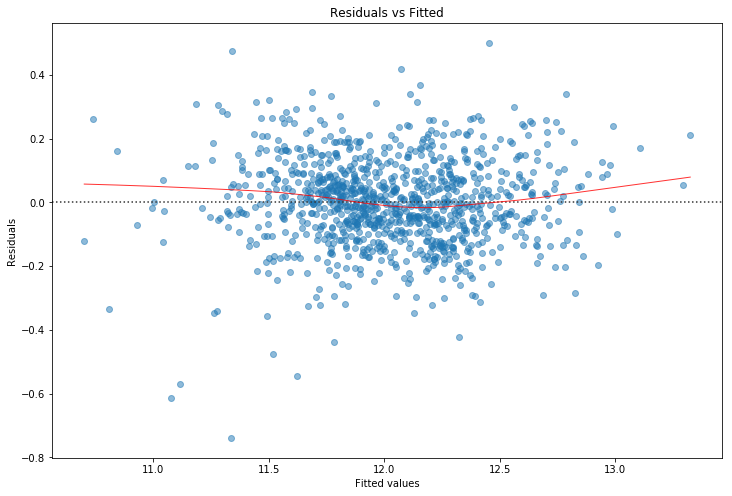

In [204]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

# fitted values (need a constant term for intercept)
model_fitted_y = model6.fittedvalues

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'SalePrice', data=data, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

## 2. QQ Plot
This plot shows if residuals are normally distributed.This plots the standardized (z-score) residuals against the theoretical normal quantiles. Anything quite off the diagonal lines may be a concern for further investigation.

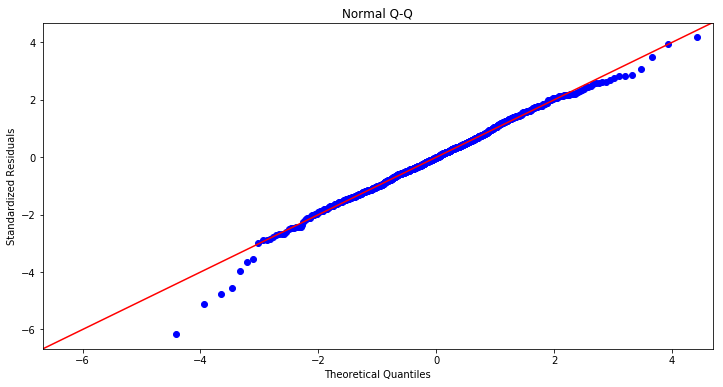

In [205]:
res = model6.resid
import scipy.stats as stats
fig = sm.qqplot(res, stats.t, fit=True, line='45')
plt.title('Normal Q-Q')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals');
plt.show() 

## 3. Scale-Location Plot
This is another residual plot, showing their spread, which you can use to assess heteroscedasticity.

It’s essentially a scatter plot of absolute square-rooted normalized residuals and fitted values, with a lowess regression line.

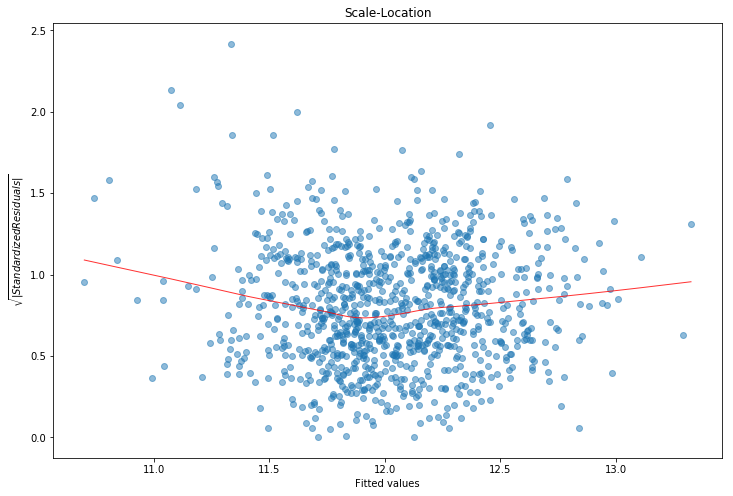

In [206]:
# normalized residuals
model_norm_residuals = model6.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

## 4. Leverage plot
This plot shows if any outliers have influence over the regression fit. Anything outside the group and outside “Cook’s Distance” lines, may have an influential effect on model fit.

In [207]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

# cook's distance, from statsmodels internals
model_cooks = model6.get_influence().cooks_distance[0]

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(model_fit.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50)) # 1 line
plt.legend(loc='upper right');

NameError: name 'model_leverage' is not defined

<Figure size 864x576 with 0 Axes>

In [978]:
# Comparison of various model
cols = ['Model', 'R-Squared Value', 'Adj.R-Squared Value', 'RMSE']
clas_model = pd.DataFrame(columns = cols)
clas_model = clas_model.append([model1_report,model2_report,model3_report,model4_report,model5_report,model6_report])
clas_model

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,Base Linear Regression Model,0.958527,0.943989,0.464362
0,Linear Regression Model with Constant,0.958527,0.943989,0.167912
0,LRM after removing VIF above 100,0.957579,0.943383,0.172947
0,LRM after removing VIF above 10,0.921361,0.903147,0.179040
0,LRM after removing VIF above 5,0.897625,0.876009,0.187339
0,LRM after removing Insignificant Variables,0.881849,0.875765,0.178451


Occam’s Razor principles can be stated as “when presented with competing hypothetical answers to a problem, one should select the one that makes the fewest assumptions”. According to Occam's Razor principle we consider Linear Regression Model after removing insignificant variables with 0.88 R-Squared value and RMSE of 0.1784 to make the model perform better with new data as well.